# Signatures

In [1]:
from io import BytesIO
import cv2
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import boto3
import PIL
from PIL import Image
from io import BytesIO
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')
bucket = 'verafin-mitacs-yifu-chen'
key ='signature-true'

In [2]:
images1=[]
variants1=[]

1. you have to identify the object that cannot be identfied by bytesio due to many reasons, like differetn type, damnaged, or others. you use ETag to identify certain object since bytes memory location cannot match with anything. in this scenerio, iinstead of deleting that object. you can slice the page["contents"] to skip that unidentified object to continue the read.
2. you can use try except pass or raise to dodge the error

In [3]:
pages = paginator.paginate(Bucket=bucket, Prefix=key)
for page in pages:
    for obj in page['Contents'][0:3]:
        print(obj)

{'Key': 'signature-true/', 'LastModified': datetime.datetime(2022, 1, 10, 19, 10, 2, tzinfo=tzlocal()), 'ETag': '"d41d8cd98f00b204e9800998ecf8427e"', 'Size': 0, 'StorageClass': 'STANDARD'}
{'Key': 'signature-true/00101001.png', 'LastModified': datetime.datetime(2022, 1, 10, 19, 26, 26, tzinfo=tzlocal()), 'ETag': '"d0117ab1e48189db7925117cf26b57b7"', 'Size': 9463, 'StorageClass': 'STANDARD'}
{'Key': 'signature-true/00102001.png', 'LastModified': datetime.datetime(2022, 1, 10, 19, 26, 36, tzinfo=tzlocal()), 'ETag': '"a9b4aaeb9f5606b8b4eed0fe19c2961d"', 'Size': 8425, 'StorageClass': 'STANDARD'}
{'Key': 'signature-true/E-S-17-F-12.png', 'LastModified': datetime.datetime(2022, 1, 11, 4, 12, 55, tzinfo=tzlocal()), 'ETag': '"4b3c25bfad72137ad68355330c387215"', 'Size': 127373, 'StorageClass': 'STANDARD'}
{'Key': 'signature-true/E-S-17-F-13.png', 'LastModified': datetime.datetime(2022, 1, 11, 4, 12, 56, tzinfo=tzlocal()), 'ETag': '"487377fc21424fc7567eface6562a66e"', 'Size': 127866, 'StorageCla

keys_to_extract = ["Body", "ETag"]

a_subset = {key: s3_client.get_object(Bucket = bucket, Key=img_key)[key] for key in keys_to_extract}
print(a_subset['ETag'])


In [4]:
from skimage import color
from skimage import io
from skimage.transform import resize

pages = paginator.paginate(Bucket=bucket, Prefix=key)
for page in pages:
    for obj in page['Contents'][2:]:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        im = io.imread(BytesIO(file_byte_string)) 
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)  
        im = resize(im, (64,256))
        im = np.array(im)           
        if im.shape == (64,256,3):
            images1.append(im)
        else:
            variants1.append(im)

pages = paginator.paginate(Bucket=bucket, Prefix=key)
for page in pages:
    for obj in page['Contents']:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        try:
            im = Image.open(BytesIO(file_byte_string))
            im = im.resize((256,32))
            im = np.array(Image.open(BytesIO(file_byte_string)))           
            if im.shape == (256,32,3):
                images.append(im)
            else:
                variants.append(im)
        except Exception:
            raise

In [5]:
print(len(images1))
print(len(variants1))

135
1040


(64, 256)


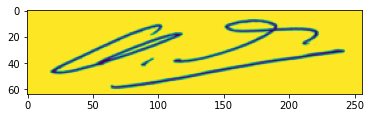

In [6]:
print(variants1[89].shape)
plt.imshow(variants1[89])

In [7]:
images2=[]
for i in variants1:
    i = np.repeat(i.reshape(64, 256, 1), 3, axis=2)
    images2.append(i)

In [8]:
print(images2[89].shape)
len(images2)

(64, 256, 3)


1040

In [9]:
gray1 = []
for i in images2:  
    image=np.uint8(cv2.normalize(i, None, 0, 255, cv2.NORM_MINMAX))  
    gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    gray1.append(gray_img)

In [10]:
gray1 = np.array(gray1)

In [11]:
gray1.shape

(1040, 64, 256)

In [50]:
images3=[]
for i in gray1:
    i = (i.reshape(64, 256, 1))
    images3.append(i)

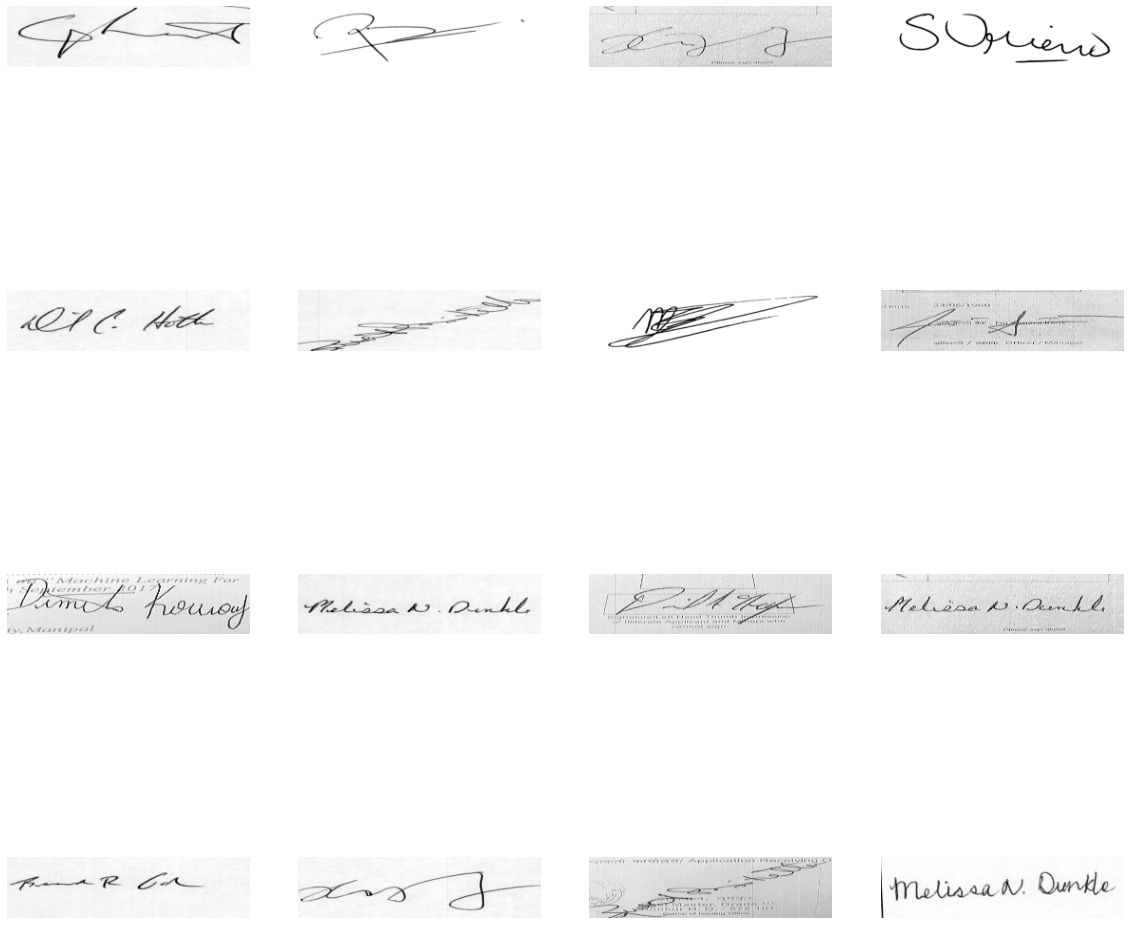

In [51]:
# random samplingly visuliaze  the original datasets
import matplotlib.pyplot as plt
num = np.random.randint(low = 0, high = 1000, size = 16)
fig = plt.figure(figsize=(20,20))
for i in np.arange(16):
    
    plt.subplot(4,4,i+1)
    plt.axis('off')
    plt.imshow(images3[num[i]], cmap='gray')

# Real Check

In [2]:
from io import BytesIO
import cv2
import numpy as np
from urllib.parse import urlparse
import matplotlib.pyplot as plt
import boto3
import PIL
from PIL import Image
from io import BytesIO
s3_client = boto3.client('s3')
paginator = s3_client.get_paginator('list_objects_v2')
bucket = 'verafin-mitacs-yifu-chen'
key ='picture'

In [3]:
pages = paginator.paginate(Bucket=bucket, Prefix=key)
for page in pages:
    for obj in page['Contents'][1:]:
        img_key=obj['Key']
        print(img_key)

picture/Picture1.jpg
picture/Screen Shot 2022-01-20 at 11.41.30 AM.png


In [4]:
from skimage import color
from skimage import io
from skimage.transform import resize

images=[]
variants=[]
pages = paginator.paginate(Bucket=bucket, Prefix=key)
for page in pages:
    for obj in page['Contents'][1:]:
        img_key=obj['Key']
        file_byte_string = s3_client.get_object(Bucket = bucket, Key=img_key)['Body'].read()
        im = io.imread(BytesIO(file_byte_string)) 
        #im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
        im = resize(im, (512,1024))
        im = np.array(im)           
        if im.shape == (512,1024,3):
            images.append(im)
        else:
            variants.append(im)

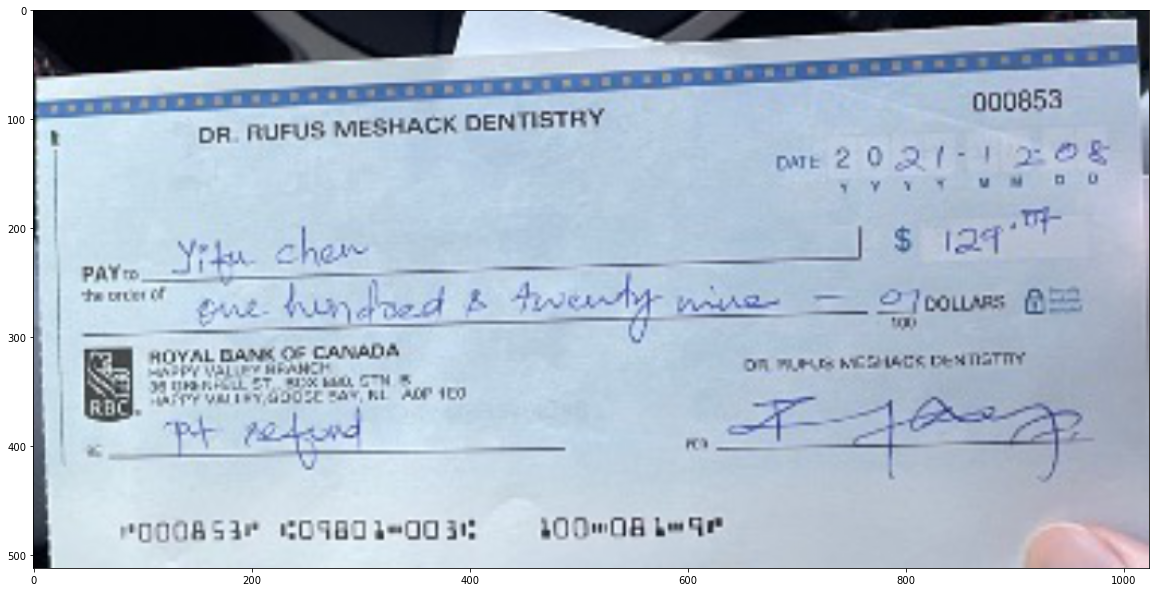

In [5]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(20,20))
plt.imshow(images[0])

In [6]:
img = color.rgb2gray(images[0])

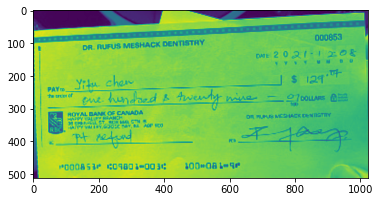

In [8]:
plt.imshow(img)

In [11]:
file_byte_string = s3_client.get_object(Bucket = bucket, Key='picture/Picture1.jpg')['Body'].read()

im =Image.open(BytesIO(file_byte_string))
print(im.size)
print(im.format)
print(im.mode)


(369, 176)
JPEG
RGB


In [12]:
# example of pixel normalization
from numpy import asarray
from PIL import Image
# load image
file_byte_string = s3_client.get_object(Bucket = bucket, Key='picture/Picture1.jpg')['Body'].read()
im =Image.open(BytesIO(file_byte_string))
pixels = asarray(im)
# confirm pixel range is 0-255
print('Data Type: %s' % pixels.dtype)
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))
# convert from integers to floats
pixels = pixels.astype('float32')
# normalize to the range 0-1
pixels /= 255.0
# confirm the normalization
print('Min: %.3f, Max: %.3f' % (pixels.min(), pixels.max()))

Data Type: uint8
Min: 0.000, Max: 255.000
Min: 0.000, Max: 1.000


In [22]:
gray = []
for i in images:
    i = np.float32(i)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2RGB)
    gray.append(i)

In [23]:
gray=np.array(gray)
gray.shape

(1, 512, 1024, 3)

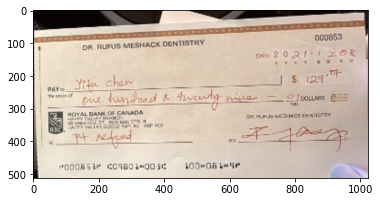

In [24]:
plt.imshow(gray[0])

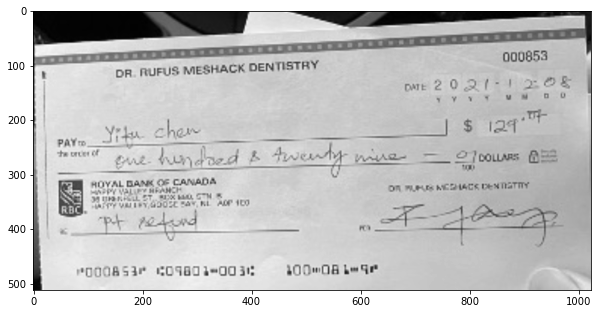

In [69]:
gray_func = lambda rgb : np.dot(rgb[... , :3] , [0.299 , 0.587, 0.114]) 
gray = gray_func(images[0])
fig = plt.figure(figsize=(10,10))
plt.imshow(gray, cmap = plt.get_cmap(name = 'gray'))
fig.savefig('real_check')

In [92]:
import numpy as np

# Convert Image into HSV space
HSV = []
for i in gray1:
    i = np.float32(i)
    i = cv2.cvtColor(i, cv2.COLOR_RGB2HSV)
    HSV.append(i)


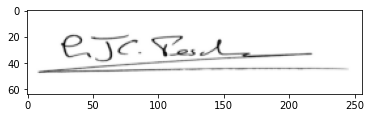

In [100]:
plt.imshow(gray1[0])

In [94]:
HSV[0].shape

(64, 256, 3)

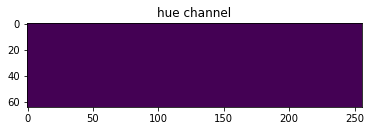

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/ipykernel/__main__.py:10: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.


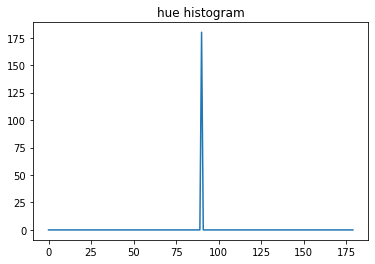

In [95]:
# extract hue channel from the image
hue = HSV[0][:,:,0]

# plotting hue channel
plt.title('hue channel')
plt.imshow(hue)
plt.show()

# calculate a histogram with 180 bins, one for each color
hist, _ = np.histogram(hue, bins=180, normed=True)
plt.title("hue histogram")
plt.plot(hist)
plt.show()

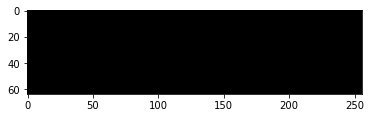

In [96]:
h = 90 # hue value
t = 20 # tolerance value

# create a binary mask for pen color
min_hue = np.array([h - t])
max_hue = np.array([h + t])

mask_hue = cv2.inRange(hue, min_hue, max_hue)

# visualise the mask
plt.imshow(mask_hue, cmap='gray')

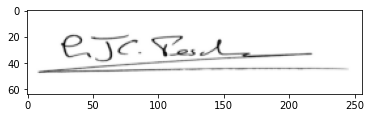

In [104]:
# modfiy hue values satisfying the condition
hue[mask_hue > 0] = hue[mask_hue > 0] + 10

# assign the modified hue channel back to the hsv image
HSV[0][:,:,0] = hue

im = cv2.cvtColor(HSV[0], cv2.COLOR_HSV2RGB)
plt.imshow(gray1[0])

In [106]:

# Convert Image into HSV space
grayy = []
for i in gray1:
    i = np.float32(i)
    i = cv2.cvtColor(i, cv2.COLOR_BGR2GRAY)
    grayy.append(i)


# Image preprocessing CLAHE (Contrast limited adaptive histogram equalization)
https://towardsdatascience.com/image-enhancement-techniques-using-opencv-and-python-9191d5c30d45

(64, 256, 3)


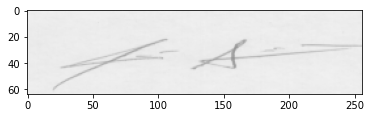

In [79]:
image = np.repeat(variants1[200].reshape(64, 256, 1), 3, axis=2)
plt.imshow(image)
print(image.shape)

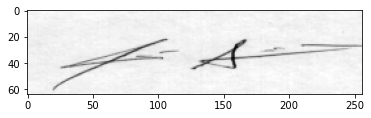

In [80]:
#if not using cv2.imread but other image open method, 
#using this one to change the data type
image=np.uint8(cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX))  
image.shape
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

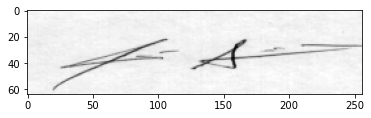

In [81]:
gray_img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap='gray')

In [27]:
gray_img.shape

(64, 256)

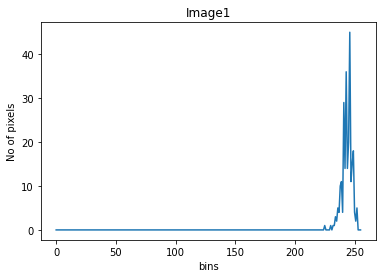

In [28]:
hist=cv2.calcHist(gray_img,[0],None,[256],[0,256])
plt.title("Image1")
plt.xlabel('bins')
plt.ylabel("No of pixels")
plt.plot(hist)
plt.show()

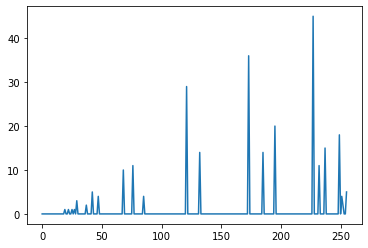

In [29]:
gray_img_eqhist=cv2.equalizeHist(gray_img)
hist=cv2.calcHist(gray_img_eqhist,[0],None,[256],[0,256])
plt.plot(hist)
plt.show()

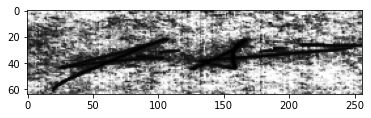

In [32]:
plt.imshow(gray_img_eqhist,cmap='gray')

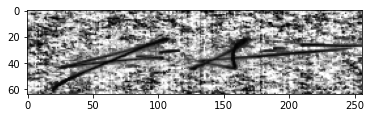

In [33]:
clahe=cv2.createCLAHE(clipLimit=40)
gray_img_clahe=clahe.apply(gray_img_eqhist)
plt.imshow(gray_img_clahe, cmap='gray')

# GAN

In [13]:
from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU,Reshape,Conv2DTranspose
from keras.utils.vis_utils import plot_model

Using TensorFlow backend.


In [52]:
def discriminator(in_shape=(64,256,1)):
    model=Sequential()
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    #dowmsampling
    model.add(Conv2D(128,(3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsampling
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #downsampling
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    #compile
    optimization = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=optimization, metrics=['acc'])
    
    return model

In [7]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 64, 256, 64)       640       
_________________________________________________________________
leaky_re_lu_17 (LeakyReLU)   (None, 64, 256, 64)       0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 32, 128, 128)      73856     
_________________________________________________________________
leaky_re_lu_18 (LeakyReLU)   (None, 32, 128, 128)      0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 16, 64, 128)       147584    
_________________________________________________________________
leaky_re_lu_19 (LeakyReLU)   (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 8, 32, 256)       

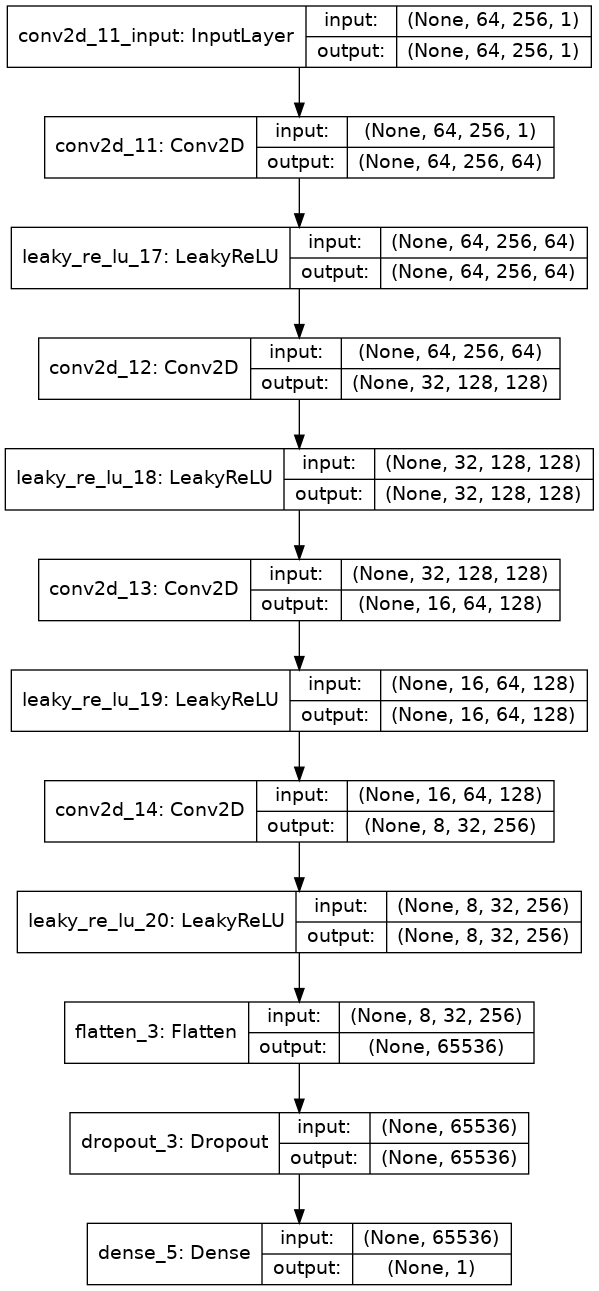

In [53]:
model = discriminator()
model.summary()

plot_model(model, to_file='discriminator_plot.png', show_shapes=True, show_layer_names=True)

In [54]:
#select real samples
def generate_real_samples(dataset, n_samples):
    #choose random instances
    ix = randint(0, dataset.shape[0], n_samples)
    #retrieve selected images
    X=dataset[ix]
    #generate 'real' class labels (1)
    y=ones((n_samples, 1))
    return X, y

In [55]:
from numpy import expand_dims
from numpy import ones
from numpy import zeros
from numpy.random import rand
from numpy.random import randint
from keras.datasets.cifar10 import load_data
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Conv2D
from keras.layers import Flatten
from keras.layers import Dropout
from keras.layers import LeakyReLU

In [56]:
#generate n fake samples with class labels
def generate_fake_samples(n_samples):
    #genrate uniform random numbers in [0,1]
    X = rand(32**3*n_samples)
    #update to have the range[-1,1]
    X= -1 + X * 2
    #reshape into a batch of color images
    X=X.reshape((n_samples, 32, 32, 3))
    #generate 'fake' class labels(0)
    y = zeros((n_samples, 1))
    return X, y

In [57]:
#generate n fake samples with class labels for handwrinting
def generate_fake_samples(n_samples):
    #genrate uniform random numbers in [0,1]
    X = rand(64*256*1*n_samples)
    #update to have the range[-1,1]
    X= -1 + X * 2
    #reshape into a batch of color images
    X=X.reshape((n_samples, 64, 256, 1))
    #generate 'fake' class labels(0)
    y = zeros((n_samples, 1))
    return X, y

In [58]:
def train_discriminator(model, dataset, n_iter=20, n_batch=128):
    half_batch = int(n_batch/2)
    #manually enumerate eopchs
    for i in range(n_iter):
        #get randomly selected 'real' samples
        X_real, y_real = generate_real_samples(dataset, half_batch)
        #update discriminator on real samples
        _, real_acc = model.train_on_batch(X_real, y_real)
        #generate ' fake' examples
        X_fake, y_fake = generate_fake_samples(half_batch)
        #update discriminator on fake samples
        _, fake_acc = model.train_on_batch(X_fake, y_fake)
        #summarize performance
        print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 65536)             6619136   
_________________________________________________________________
leaky_re_lu_21 (LeakyReLU)   (None, 65536)             0         
_________________________________________________________________
reshape_3 (Reshape)          (None, 8, 32, 256)        0         
_________________________________________________________________
conv2d_transpose_7 (Conv2DTr (None, 16, 64, 128)       524416    
_________________________________________________________________
leaky_re_lu_22 (LeakyReLU)   (None, 16, 64, 128)       0         
_________________________________________________________________
conv2d_transpose_8 (Conv2DTr (None, 32, 128, 128)      262272    
_________________________________________________________________
leaky_re_lu_23 (LeakyReLU)   (None, 32, 128, 128)     

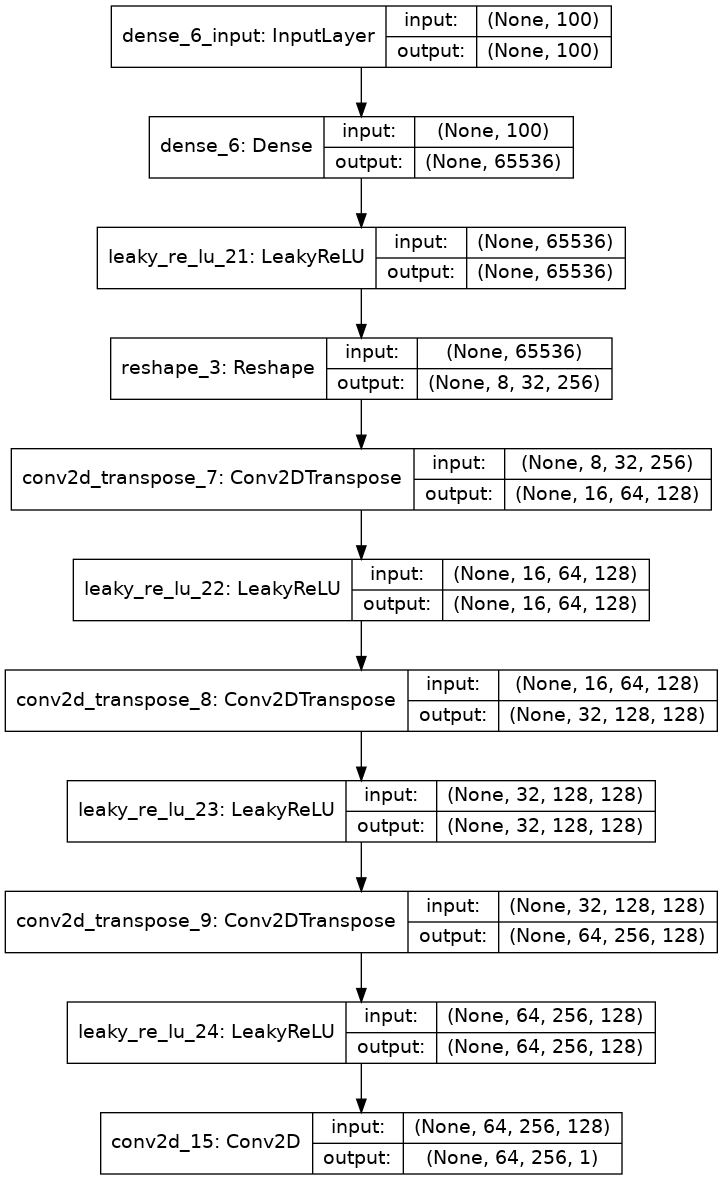

In [59]:
from numpy.random import randn
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
#a smaller low-resolution version of te image works better in a first dense layer
#foundation of 4 * 32 image

def generator(latent_dim):
    model = Sequential()
    n_nodes = 256 * 8 * 32
    model.add(Dense(n_nodes, input_dim=latent_dim))
    model.add(LeakyReLU(alpha=0.2))
    model.add(Reshape((8,32,256)))
    #upsampling to 8 * 64
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsampling to 16 * 128
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #upsampling to 32 * 256
    model.add(Conv2DTranspose(128, (4,4), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    #output layer
    model.add(Conv2D(1, (3,3), activation='tanh', padding='same'))
    return model

#define latent space
latent_dim = 100
model = generator(latent_dim)
model.summary()
plot_model(model, to_file='generator_plot.png', show_shapes=True, show_layer_names=True)

In [60]:
# generate point in the latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
    #generate points in the latent space
    x_input = randn(latent_dim * n_samples)
    #reshape into a batch of inputs for the network
    x_input = x_input.reshape(n_samples, latent_dim)
    return x_input

In [61]:
# using the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
    # generate points in the latent space
    x_input = generate_latent_points(latent_dim, n_samples)
    # predict outputs
    X = g_model.predict(x_input)
    # create 'fake' class labels (0)
    y = zeros((n_samples, 1))
    
    return X, y

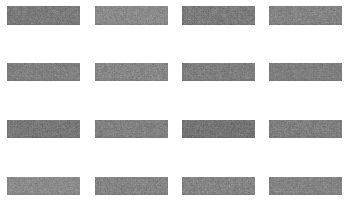

In [63]:
import matplotlib.pyplot as plt
n_samples = 16
X, _ = generate_fake_samples(model, latent_dim, n_samples)
# scale pixel values from [-1, 1 to [0,1]]
X = (X + 1)/ 2

for i in range(n_samples):
    plt.subplot(4, 4, i+1)
    plt.axis('off')
    plt.imshow(X[i], cmap='gray')

In [64]:
# define the combined generator and discriminator model, for updating the generator
def gan(g_model,d_model):
    # make weights in the discriminator not trainable
    d_model.trainable = False
    # connect them
    model = Sequential()
    # add generator
    model.add(g_model)
    # add disriminator
    model.add(d_model)
    # compile model
    opt = Adam(lr=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt)
    return model

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_8 (Sequential)    (None, 64, 256, 1)        7669249   
_________________________________________________________________
sequential_9 (Sequential)    (None, 1)                 582785    
Total params: 8,252,034
Trainable params: 7,669,249
Non-trainable params: 582,785
_________________________________________________________________


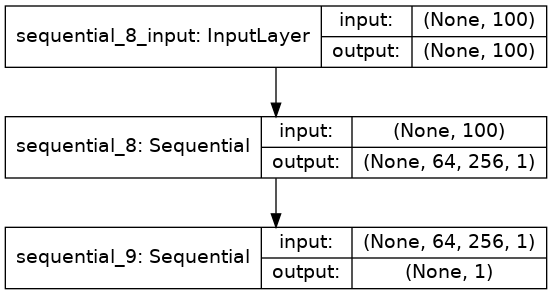

In [65]:
g_model = generator(latent_dim)
d_model = discriminator()
gan_model = gan(g_model, d_model)
gan_model.summary()
plot_model(gan_model, to_file='gan_plot.png', show_shapes=True, show_layer_names=True)

In [66]:
# train the composite model
# this is where you make the generated samples as real from the G
def train_gan(gan_model, latent_dim, n_epochs=20, n_batch=128):
    # manually enumerate epochs
    for i in range(n_epochs):
        # prepare points in latent space as inpt for the G
        x_gan = generate_latent_points(latent_dim, n_batch)
        #create inverted labels for the fake exmaples
        y_gan = ones((n_batch,1))
        # update the G via the D's error
        gan_model.train_on_batch(x_gan, y_gan)

* a few things to note in this model training function number of batches within an epoch is defined by how many times the batch size divides into the training dataset.
* the D model is updated twice per batch, once with real samples and once with fake samples, which is a best practice as opposed to combine the samples and performing a single update.
* Finally, we report the loss each batch. it is critical to keep an eye on the loss over batches. since a crash in the D loss indicates that the D model has started generating rubbish examples that the D can easily discriminate

In [67]:
# train the G and D
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=64):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update D model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate fake samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update D model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator 
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the D's error
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %
                 (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))

# Evaluate GAN model performance

## there are three ways to hanfle the complex training situation
* Periodically evaluate the classification accuracy of the D on real and fake images
* Periodically generate many images and save them to file for subjective review
* peridocally save the G model 

### Firstly, we define a function that summarizes the performance of the D model. it does this by retrieving a sample of real CIFAR-10 images, as well as generating the same number of fake CIFAR10 images with the G model. then evaluating the classification accuracy of the D on each sampleand reporting these erroes

In [68]:
# evaluate the D, plot generated images, save the G
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples= 150):
    # prepare real samples
    X_real, y_real = generate_real_samples(dataset, n_samples)
    # evaluate D on real examples
    _, acc_real = d_model.evaluate(X_real, y_real, verbose=0)
    # prepare fake exmaples
    X_fake, y_fake = generate_fake_samples(g_model, latent_dim, n_samples)
    # evaluate D on fake examples
    _, acc_fake = d_model.evaluate(X_fake, y_fake, verbose=0)
    # summarize D performance
    print('>Accuracy real: %0f%%, fake: %.0f%%' % (acc_real*100, acc_fake*100))
    
    #save plot
    save_plot(X_fake, epoch)
    # save the G model
    filename = 'generator_model_%03d.h5' % (epoch + 1)
    g_model.save(filename)

In [69]:
# create and save a plot of generated images
def save_plot(examples, epoch, n=7):
    # scale from [-1, 1] to [0,1]
    examples = (examples + 1) /2
    fig = plt.figure(figsize=(20,20))
    # plot images
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(examples[i])
    # save plot to file

    filename = 'generator_plot_%03d.png' % (epoch + 1)
    plt.savefig(filename)
    plt.close()

# updated version of train

In [70]:
d_model.metrics_names

['loss', 'acc']

In [71]:
# train the G and D
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=200, n_batch=64):
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    for i in range(n_epochs):
        # enumerate batches over the training set
        for j in range(bat_per_epo):
            # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update D model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate fake samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update D model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator 
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the D's erroraccuracy
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' %
                 (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
        # evaluate the model performance, sometimes
        if (i+1) % 10 == 0:
            summarize_performance(i, g_model, d_model, dataset, latent_dim)

In [72]:
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=500, n_batch=32):
    all_gl = np.array([]); all_dl1 = np.array([]); all_dl2 = np.array([])
    bat_per_epo = int(dataset.shape[0] / n_batch)
    half_batch = int(n_batch / 2)
    # manually enumerate epochs
    
    start1 = time.time()
    
    for epoch in tqdm(range(n_epochs)):
        # enumerate batches over the training set
        start2 = time.time()
        
        G_loss = []; D_loss1 = []; D_loss2 = []
        
        for batch in range(bat_per_epo):
             # get randomly selected 'real' samples
            X_real, y_real = generate_real_samples(dataset, half_batch)
            # update D model weights
            d_loss1, _ = d_model.train_on_batch(X_real, y_real)
            # generate fake samples
            X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
            # update D model weights
            d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
            # prepare points in latent space as input for the generator 
            X_gan = generate_latent_points(latent_dim, n_batch)
            # create inverted labels for the fake samples
            y_gan = ones((n_batch, 1))
            # update the generator via the D's erroraccuracy
            g_loss = gan_model.train_on_batch(X_gan, y_gan)
            # summarize loss on this batch
            
            #calculate G_loss and fake D_loss and real D_loss in each batch under each epoch and all epochs
            G_loss.append(g_loss); D_loss1.append(d_loss1); D_loss2.append(d_loss2)
            all_gl = np.append(all_gl,np.array([G_loss]))
            all_dl1 = np.append(all_dl1,np.array([D_loss1]))
            all_dl2 = np.append(all_dl2,np.array([D_loss2]))
            
            if batch % 1 == 0:
                print('>%d, %d/%d, d1=%.3f, d2=%.3f, g=%.3f' % (batch, epoch, bat_per_epo, d_loss1, d_loss2, g_loss))
        
        print('Epoch: {} computed for {} sec'.format(epoch + 1, time.time() - start2))
            
        # evaluate the model performance and plot losses
        if (epoch+1) % 10 == 0:
            summarize_performance(epoch, g_model, d_model, dataset, latent_dim)
            plot_losses(D_loss1, D_loss2, G_loss, all_gl, all_dl1, all_dl2, epoch+1)
    print('Mission completed:', time.time() - start1)

In [73]:
def plot_losses(d_loss1, d_loss2, g_loss, all_gl, all_dl1, all_dl2, n_epoch):
    plt.figure(figsize=(10,5))
    plt.title("Discriminator Loss - EPOCH {}".format(n_epoch))
    plt.plot(d_loss1,label="D1")
    plt.plot(d_loss2,label="D2")
    plt.plot(g_loss,label="G")
    plt.xlabel("Iterations")
    plt.ylabel("Loss")
    plt.legend()
    #ymax = plt.ylim()[1]
    plt.show()
    
    plt.figure(figsize=(10,5))
    plt.plot(np.arange(len(all_gl)),all_gl,label='G')
    plt.plot(np.arange(len(all_dl1)),all_dl1,label='D1')
    plt.plot(np.arange(len(all_dl2)),all_dl2,label='D2')
    plt.legend()
    #plt.ylim((0,np.min([1.1*np.max(all_gl),2*ymax])))
    plt.title('All Time Loss')
    plt.show()

In [74]:
def load_real_samples():
    trainX = from_s3_npy('s3://verafin-mitacs-yifu-chen/32_256_signature/')#(trainX, _), (_,_) = load_data()
    X = trainX.astype('float32')
    X = (X - 127.5) / 127.5
    
    return X

In [76]:
latent_dim = 100
d_model = discriminator()
g_model = generator(latent_dim)
gan_model = gan(g_model, d_model)

#dataset = images

In [79]:
X = np.array(images3)

In [80]:
X = (X - 127.5) / 127.5

In [81]:
print(X.shape)
X[599]

(1040, 64, 256, 1)


array([[[ 0.74901961],
        [ 0.65490196],
        [ 0.69411765],
        ...,
        [ 0.88235294],
        [ 0.89803922],
        [-0.05098039]],

       [[ 0.82745098],
        [ 0.82745098],
        [ 0.84313725],
        ...,
        [ 0.8745098 ],
        [ 0.90588235],
        [ 0.00392157]],

       [[ 0.81960784],
        [ 0.84313725],
        [ 0.85098039],
        ...,
        [ 0.8745098 ],
        [ 0.89019608],
        [ 0.12156863]],

       ...,

       [[ 0.78823529],
        [ 0.81176471],
        [ 0.78039216],
        ...,
        [ 0.83529412],
        [ 0.81960784],
        [ 0.78039216]],

       [[ 0.78039216],
        [ 0.82745098],
        [ 0.82745098],
        ...,
        [ 0.83529412],
        [ 0.81960784],
        [ 0.76470588]],

       [[ 0.81960784],
        [ 0.82745098],
        [ 0.81176471],
        ...,
        [ 0.7254902 ],
        [ 0.67843137],
        [ 0.5372549 ]]])

In [83]:
import glob
import imageio
anim_file = 'signature.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('generator_plot_*.png')
    filenames = sorted(filenames)
    last = -1
    for i,filename in enumerate(filenames):
        frame = 50*(i**2)
        if round(frame) > round(last):
            last = frame
        else:
            continue
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

import IPython
if IPython.version_info > (6,2,0,''):
    IPython.display.Image(filename=anim_file)

In [85]:
pip install git+https://github.com/tensorflow/docs

  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-o9ff7vl1
  Running command git clone --filter=blob:none -q https://github.com/tensorflow/docs /tmp/pip-req-build-o9ff7vl1
  Resolved https://github.com/tensorflow/docs to commit c5dc4ff1c09ea4d8d70ae7c3831cb3ad1c3a9b1d
  Preparing metadata (setup.py) ... done
  Created wheel for tensorflow-docs: filename=tensorflow_docs-0.0.0.dev0-py3-none-any.whl size=169666 sha256=48bd4e06a5401788e0ebe7fb6c0f537c03b2506dd6e4e2db0fdef0a4e566f95d
  Stored in directory: /tmp/pip-ephem-wheel-cache-fpo0s38h/wheels/27/ca/30/9fb73780f8e8eb5a8321ae35616b0e9609f33e6c6f4071e8dd
Successfully built tensorflow-docs
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import tensorflow_docs.vis.embed as embed
embed.embed_file(anim_file)

  0%|          | 0/500 [00:00<?, ?it/s]

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'
/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 0/32, d1=0.717, d2=0.695, g=0.693
>1, 0/32, d1=0.503, d2=0.695, g=0.694
>2, 0/32, d1=0.265, d2=0.698, g=0.696


/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>3, 0/32, d1=0.079, d2=0.703, g=0.699
>4, 0/32, d1=0.013, d2=0.711, g=0.699
>5, 0/32, d1=0.006, d2=0.734, g=0.693
>6, 0/32, d1=0.008, d2=0.764, g=0.699
>7, 0/32, d1=0.033, d2=0.791, g=0.722
>8, 0/32, d1=0.092, d2=0.911, g=0.723
>9, 0/32, d1=0.176, d2=1.036, g=0.699
>10, 0/32, d1=0.268, d2=1.061, g=0.717
>11, 0/32, d1=0.399, d2=0.986, g=0.733
>12, 0/32, d1=0.466, d2=0.961, g=0.754
>13, 0/32, d1=0.559, d2=0.858, g=0.765
>14, 0/32, d1=0.632, d2=0.778, g=0.772
>15, 0/32, d1=0.652, d2=0.725, g=0.786
>16, 0/32, d1=0.640, d2=0.704, g=0.796
>17, 0/32, d1=0.624, d2=0.703, g=0.827
>18, 0/32, d1=0.635, d2=0.651, g=0.854
>19, 0/32, d1=0.614, d2=0.650, g=0.876
>20, 0/32, d1=0.600, d2=0.654, g=0.912
>21, 0/32, d1=0.572, d2=0.614, g=0.960
>22, 0/32, d1=0.543, d2=0.617, g=0.953
>23, 0/32, d1=0.527, d2=0.588, g=1.034
>24, 0/32, d1=0.594, d2=0.641, g=1.025
>25, 0/32, d1=0.473, d2=0.548, g=1.124
>26, 0/32, d1=0.454, d2=0.685, g=1.269
>27, 0/32, d1=0.573, d2=0.390, g=1.401
>28, 0/32, d1=0.550, d2=0.382, g

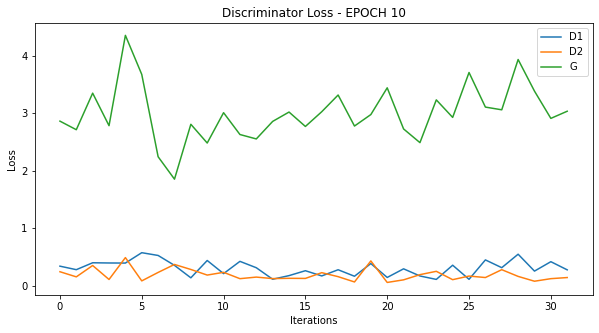

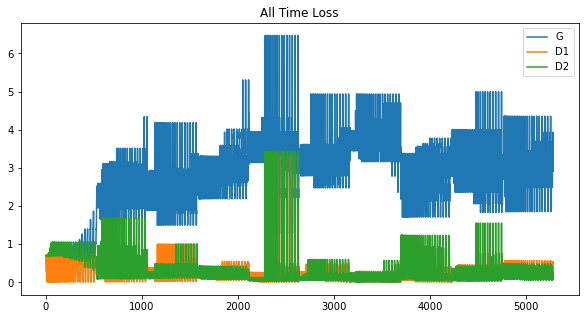

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 10/32, d1=0.169, d2=0.133, g=3.482
>1, 10/32, d1=0.062, d2=0.064, g=4.004
>2, 10/32, d1=0.551, d2=0.172, g=2.023
>3, 10/32, d1=0.230, d2=0.317, g=2.426
>4, 10/32, d1=0.051, d2=0.100, g=3.335
>5, 10/32, d1=0.133, d2=0.061, g=3.697
>6, 10/32, d1=0.321, d2=0.179, g=3.724
>7, 10/32, d1=0.465, d2=0.309, g=3.961
>8, 10/32, d1=0.701, d2=0.249, g=2.991
>9, 10/32, d1=0.522, d2=0.674, g=2.962
>10, 10/32, d1=0.369, d2=0.161, g=3.233
>11, 10/32, d1=0.791, d2=0.461, g=2.021
>12, 10/32, d1=0.191, d2=0.281, g=2.989
>13, 10/32, d1=0.314, d2=0.354, g=4.015
>14, 10/32, d1=0.656, d2=0.213, g=2.266
>15, 10/32, d1=0.181, d2=0.695, g=4.178
>16, 10/32, d1=0.981, d2=0.087, g=2.286
>17, 10/32, d1=0.262, d2=0.240, g=2.018
>18, 10/32, d1=0.286, d2=0.276, g=2.531
>19, 10/32, d1=0.361, d2=0.285, g=2.870
>20, 10/32, d1=0.504, d2=0.143, g=2.736
>21, 10/32, d1=0.300, d2=0.624, g=3.560
>22, 10/32, d1=0.649, d2=0.177, g=2.743
>23, 10/32, d1=0.302, d2=0.203, g=2.513
>24, 10/32, d1=0.351, d2=0.484, g=2.545
>25, 10/32

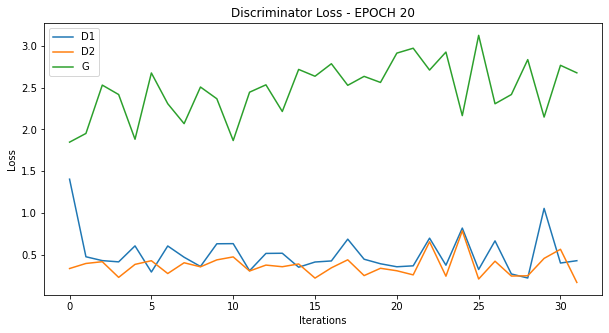

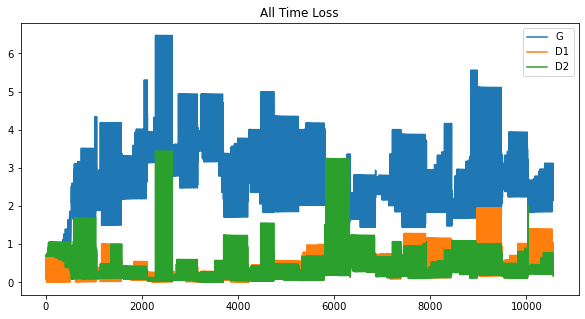

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 20/32, d1=0.438, d2=0.352, g=2.131
>1, 20/32, d1=0.443, d2=0.440, g=2.185
>2, 20/32, d1=0.351, d2=0.267, g=2.577
>3, 20/32, d1=0.397, d2=0.274, g=2.492
>4, 20/32, d1=0.238, d2=0.262, g=2.627
>5, 20/32, d1=0.926, d2=0.826, g=2.709
>6, 20/32, d1=0.483, d2=0.186, g=2.928
>7, 20/32, d1=0.662, d2=0.344, g=2.099
>8, 20/32, d1=0.291, d2=0.517, g=2.640
>9, 20/32, d1=0.353, d2=0.126, g=2.949
>10, 20/32, d1=0.516, d2=0.282, g=2.187
>11, 20/32, d1=0.408, d2=0.375, g=2.572
>12, 20/32, d1=0.158, d2=0.151, g=2.967
>13, 20/32, d1=0.524, d2=0.259, g=1.795
>14, 20/32, d1=0.513, d2=0.751, g=2.123
>15, 20/32, d1=0.327, d2=0.234, g=2.662
>16, 20/32, d1=0.965, d2=0.522, g=2.213
>17, 20/32, d1=0.238, d2=0.367, g=2.235
>18, 20/32, d1=0.530, d2=0.530, g=2.510
>19, 20/32, d1=0.635, d2=0.447, g=2.684
>20, 20/32, d1=0.727, d2=0.474, g=2.099
>21, 20/32, d1=0.575, d2=0.584, g=2.652
>22, 20/32, d1=0.382, d2=0.189, g=2.781
>23, 20/32, d1=0.330, d2=0.232, g=2.845
>24, 20/32, d1=0.517, d2=0.305, g=2.987
>25, 20/32

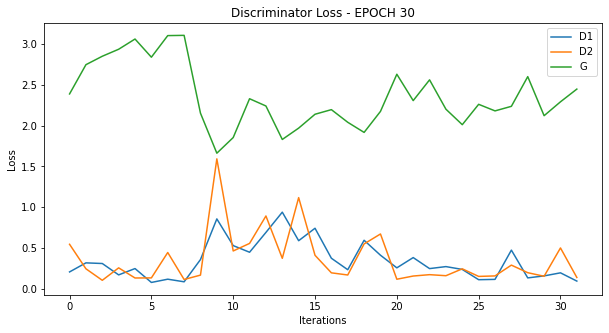

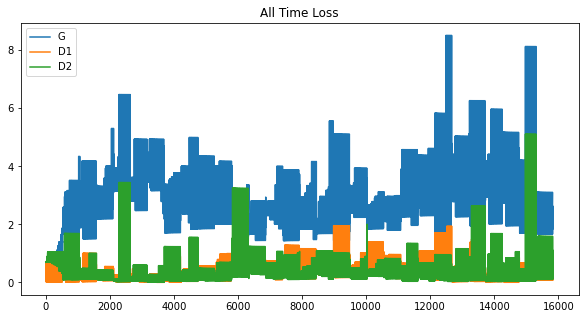

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 30/32, d1=0.606, d2=0.345, g=2.298
>1, 30/32, d1=0.271, d2=0.239, g=2.072
>2, 30/32, d1=0.147, d2=0.218, g=1.978
>3, 30/32, d1=0.150, d2=0.302, g=2.455
>4, 30/32, d1=0.147, d2=0.131, g=2.649
>5, 30/32, d1=0.289, d2=0.145, g=2.317
>6, 30/32, d1=0.261, d2=0.154, g=2.267
>7, 30/32, d1=0.194, d2=0.141, g=2.160
>8, 30/32, d1=0.250, d2=0.186, g=1.979
>9, 30/32, d1=0.497, d2=0.265, g=1.801
>10, 30/32, d1=0.097, d2=0.198, g=2.335
>11, 30/32, d1=0.230, d2=0.201, g=2.645
>12, 30/32, d1=0.302, d2=0.139, g=2.684
>13, 30/32, d1=0.176, d2=0.132, g=2.485
>14, 30/32, d1=0.297, d2=0.198, g=2.358
>15, 30/32, d1=0.116, d2=0.165, g=2.409
>16, 30/32, d1=0.089, d2=0.142, g=2.564
>17, 30/32, d1=0.358, d2=0.309, g=1.933
>18, 30/32, d1=0.047, d2=0.241, g=2.669
>19, 30/32, d1=0.408, d2=0.228, g=2.269
>20, 30/32, d1=0.315, d2=0.280, g=2.281
>21, 30/32, d1=0.463, d2=0.404, g=3.205
>22, 30/32, d1=0.487, d2=0.106, g=2.626
>23, 30/32, d1=0.096, d2=0.122, g=2.854
>24, 30/32, d1=0.275, d2=0.225, g=2.262
>25, 30/32

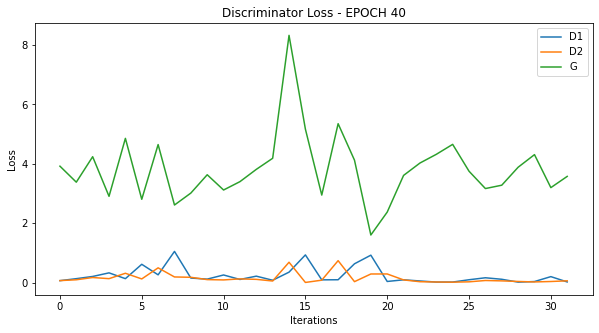

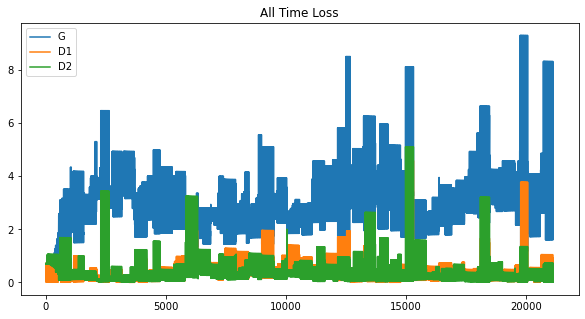

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 40/32, d1=0.001, d2=0.104, g=4.391
>1, 40/32, d1=0.039, d2=0.184, g=6.995
>2, 40/32, d1=0.005, d2=0.043, g=7.143
>3, 40/32, d1=2.242, d2=2.843, g=4.574
>4, 40/32, d1=0.337, d2=0.031, g=5.718
>5, 40/32, d1=1.189, d2=0.270, g=3.438
>6, 40/32, d1=0.292, d2=0.280, g=5.084
>7, 40/32, d1=0.228, d2=0.026, g=4.769
>8, 40/32, d1=0.285, d2=0.084, g=3.224
>9, 40/32, d1=0.132, d2=0.439, g=4.207
>10, 40/32, d1=0.391, d2=0.048, g=4.189
>11, 40/32, d1=0.681, d2=0.332, g=2.547
>12, 40/32, d1=0.117, d2=0.217, g=2.922
>13, 40/32, d1=0.218, d2=0.134, g=3.082
>14, 40/32, d1=0.134, d2=0.134, g=2.927
>15, 40/32, d1=0.126, d2=0.133, g=3.081
>16, 40/32, d1=0.217, d2=0.077, g=3.368
>17, 40/32, d1=0.098, d2=0.069, g=3.174
>18, 40/32, d1=0.053, d2=0.055, g=3.361
>19, 40/32, d1=0.153, d2=0.074, g=3.410
>20, 40/32, d1=0.070, d2=0.080, g=3.592
>21, 40/32, d1=0.107, d2=0.051, g=3.563
>22, 40/32, d1=0.176, d2=0.159, g=3.611
>23, 40/32, d1=0.191, d2=0.080, g=3.585
>24, 40/32, d1=0.195, d2=0.142, g=3.168
>25, 40/32

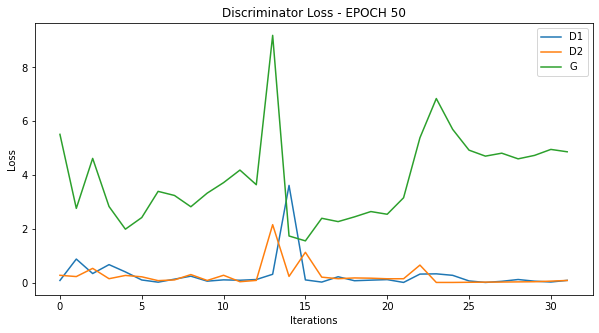

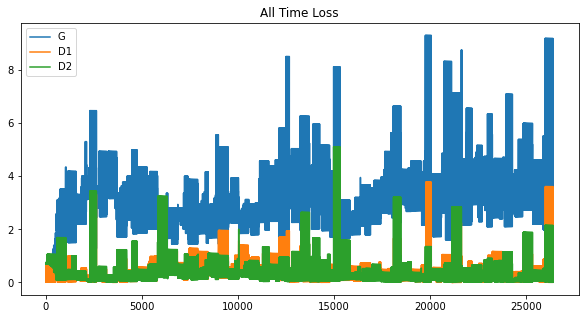

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 50/32, d1=0.006, d2=0.112, g=5.123
>1, 50/32, d1=0.188, d2=0.227, g=10.184
>2, 50/32, d1=0.089, d2=0.001, g=9.664
>3, 50/32, d1=0.100, d2=0.010, g=4.956
>4, 50/32, d1=0.172, d2=0.169, g=3.265
>5, 50/32, d1=0.018, d2=0.754, g=7.721
>6, 50/32, d1=0.710, d2=0.001, g=7.626
>7, 50/32, d1=0.302, d2=0.005, g=5.605
>8, 50/32, d1=0.470, d2=0.030, g=3.743
>9, 50/32, d1=0.002, d2=0.040, g=3.245
>10, 50/32, d1=0.085, d2=0.229, g=3.328
>11, 50/32, d1=0.001, d2=0.078, g=3.892
>12, 50/32, d1=0.118, d2=0.215, g=4.017
>13, 50/32, d1=0.038, d2=0.318, g=4.519
>14, 50/32, d1=0.349, d2=0.274, g=5.408
>15, 50/32, d1=0.663, d2=0.347, g=5.158
>16, 50/32, d1=0.559, d2=0.243, g=4.311
>17, 50/32, d1=0.310, d2=0.073, g=3.195
>18, 50/32, d1=0.081, d2=0.301, g=4.727
>19, 50/32, d1=0.397, d2=0.034, g=4.382
>20, 50/32, d1=0.177, d2=0.189, g=4.514
>21, 50/32, d1=0.240, d2=0.049, g=3.817
>22, 50/32, d1=0.347, d2=0.104, g=3.430
>23, 50/32, d1=0.247, d2=0.204, g=3.723
>24, 50/32, d1=0.050, d2=0.031, g=3.972
>25, 50/3

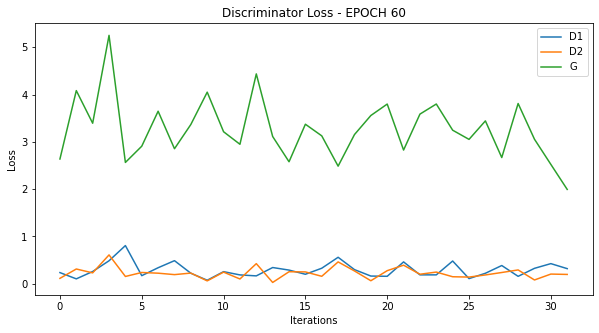

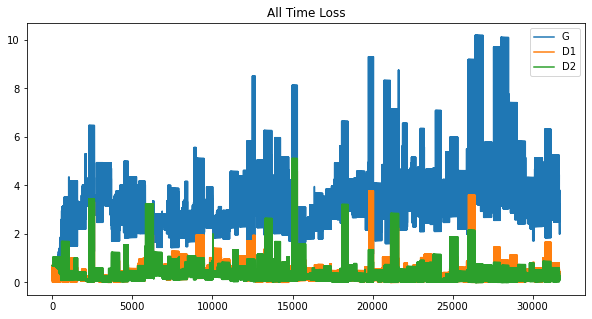

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 60/32, d1=0.042, d2=0.278, g=3.855
>1, 60/32, d1=0.330, d2=0.105, g=3.342
>2, 60/32, d1=0.134, d2=0.343, g=4.002
>3, 60/32, d1=0.168, d2=0.034, g=3.961
>4, 60/32, d1=0.185, d2=0.110, g=3.056
>5, 60/32, d1=0.066, d2=0.115, g=3.485
>6, 60/32, d1=0.063, d2=0.104, g=4.772
>7, 60/32, d1=0.599, d2=0.583, g=2.528
>8, 60/32, d1=0.141, d2=0.110, g=3.467
>9, 60/32, d1=0.286, d2=0.264, g=2.516
>10, 60/32, d1=0.246, d2=0.175, g=3.031
>11, 60/32, d1=0.372, d2=0.334, g=3.975
>12, 60/32, d1=0.206, d2=0.048, g=3.273
>13, 60/32, d1=0.165, d2=0.134, g=2.888
>14, 60/32, d1=0.107, d2=0.408, g=5.211
>15, 60/32, d1=1.123, d2=0.207, g=2.041
>16, 60/32, d1=0.044, d2=0.263, g=2.906
>17, 60/32, d1=0.179, d2=0.164, g=3.130
>18, 60/32, d1=0.279, d2=0.174, g=2.815
>19, 60/32, d1=0.080, d2=0.193, g=3.554
>20, 60/32, d1=0.599, d2=0.310, g=2.455
>21, 60/32, d1=0.121, d2=0.154, g=3.035
>22, 60/32, d1=0.267, d2=0.246, g=3.171
>23, 60/32, d1=0.104, d2=0.284, g=3.864
>24, 60/32, d1=0.448, d2=0.280, g=3.633
>25, 60/32

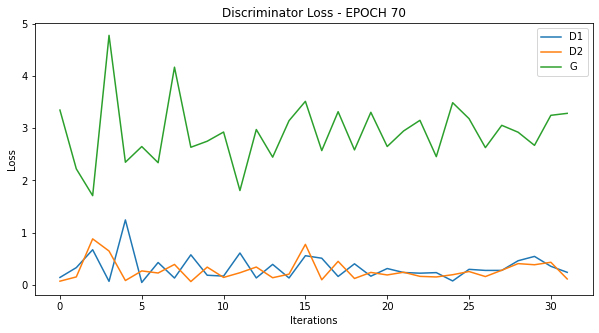

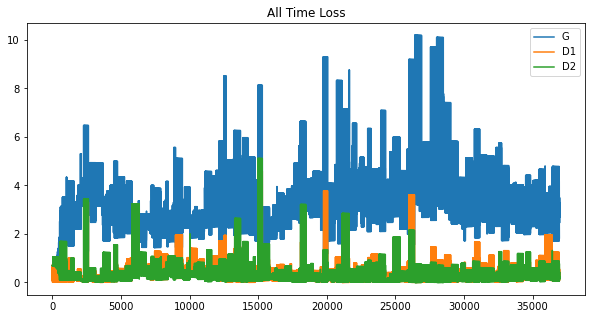

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 70/32, d1=0.237, d2=0.235, g=3.326
>1, 70/32, d1=0.288, d2=0.466, g=4.843
>2, 70/32, d1=0.995, d2=0.449, g=2.100
>3, 70/32, d1=0.056, d2=0.221, g=3.037
>4, 70/32, d1=0.286, d2=0.125, g=3.198
>5, 70/32, d1=0.129, d2=0.087, g=3.028
>6, 70/32, d1=0.143, d2=0.187, g=3.018
>7, 70/32, d1=0.211, d2=0.192, g=3.332
>8, 70/32, d1=0.353, d2=0.250, g=2.651
>9, 70/32, d1=0.409, d2=0.384, g=3.197
>10, 70/32, d1=0.494, d2=0.350, g=2.724
>11, 70/32, d1=0.234, d2=0.169, g=2.878
>12, 70/32, d1=0.188, d2=0.268, g=3.353
>13, 70/32, d1=0.267, d2=0.328, g=3.915
>14, 70/32, d1=0.369, d2=0.099, g=2.746
>15, 70/32, d1=0.137, d2=0.266, g=3.160
>16, 70/32, d1=0.186, d2=0.083, g=3.134
>17, 70/32, d1=0.399, d2=0.192, g=1.757
>18, 70/32, d1=0.087, d2=0.287, g=3.321
>19, 70/32, d1=0.173, d2=0.128, g=3.612
>20, 70/32, d1=0.330, d2=0.165, g=2.756
>21, 70/32, d1=0.229, d2=0.316, g=2.764
>22, 70/32, d1=0.212, d2=0.114, g=2.520
>23, 70/32, d1=0.168, d2=0.428, g=3.726
>24, 70/32, d1=0.384, d2=0.108, g=2.643
>25, 70/32

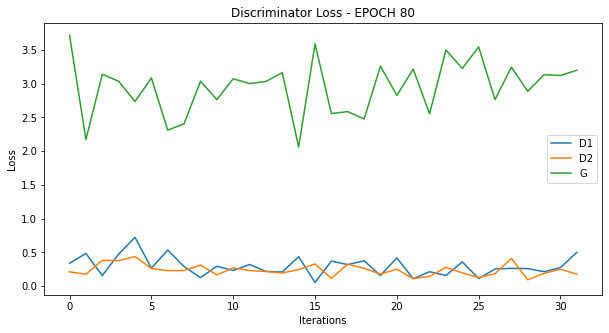

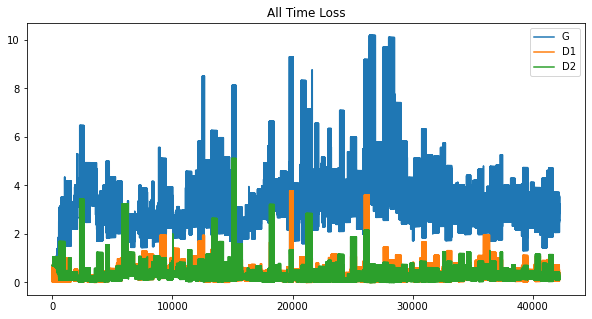

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 80/32, d1=0.467, d2=0.463, g=2.561
>1, 80/32, d1=0.190, d2=0.398, g=4.346
>2, 80/32, d1=0.918, d2=0.405, g=1.959
>3, 80/32, d1=0.110, d2=0.297, g=2.628
>4, 80/32, d1=0.234, d2=0.203, g=3.028
>5, 80/32, d1=0.155, d2=0.200, g=3.343
>6, 80/32, d1=0.366, d2=0.086, g=2.208
>7, 80/32, d1=0.282, d2=0.888, g=4.592
>8, 80/32, d1=0.849, d2=0.311, g=3.344
>9, 80/32, d1=0.185, d2=0.093, g=2.752
>10, 80/32, d1=0.242, d2=0.332, g=3.018
>11, 80/32, d1=0.438, d2=0.246, g=3.024
>12, 80/32, d1=0.417, d2=0.506, g=2.884
>13, 80/32, d1=0.469, d2=0.284, g=2.913
>14, 80/32, d1=0.203, d2=0.244, g=3.647
>15, 80/32, d1=0.993, d2=1.159, g=2.813
>16, 80/32, d1=0.672, d2=0.178, g=2.019
>17, 80/32, d1=0.325, d2=0.431, g=2.110
>18, 80/32, d1=0.136, d2=0.300, g=2.920
>19, 80/32, d1=0.398, d2=0.257, g=2.716
>20, 80/32, d1=0.261, d2=0.253, g=3.128
>21, 80/32, d1=0.410, d2=0.173, g=2.296
>22, 80/32, d1=0.603, d2=0.487, g=1.769
>23, 80/32, d1=0.113, d2=0.232, g=2.690
>24, 80/32, d1=0.201, d2=0.200, g=3.349
>25, 80/32

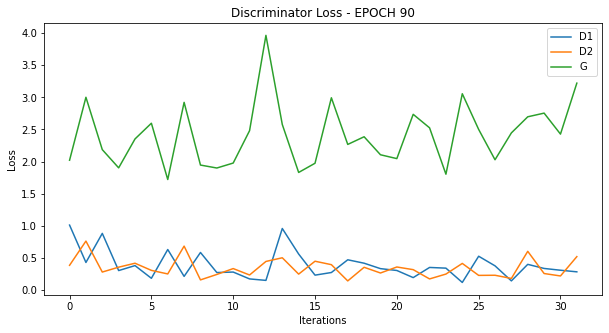

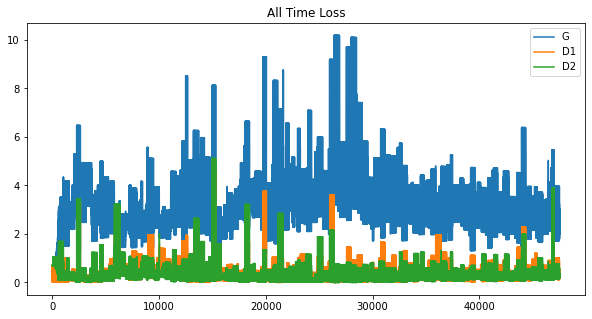

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 90/32, d1=0.522, d2=0.208, g=2.532
>1, 90/32, d1=0.548, d2=0.416, g=1.763
>2, 90/32, d1=0.250, d2=0.401, g=2.225
>3, 90/32, d1=0.193, d2=0.115, g=2.505
>4, 90/32, d1=0.374, d2=0.198, g=1.952
>5, 90/32, d1=0.149, d2=0.322, g=2.694
>6, 90/32, d1=0.611, d2=0.609, g=3.878
>7, 90/32, d1=1.003, d2=0.268, g=1.702
>8, 90/32, d1=0.203, d2=0.683, g=2.508
>9, 90/32, d1=0.201, d2=0.103, g=2.821
>10, 90/32, d1=0.632, d2=0.352, g=1.882
>11, 90/32, d1=0.353, d2=0.479, g=2.201
>12, 90/32, d1=0.272, d2=0.155, g=2.610
>13, 90/32, d1=0.515, d2=0.396, g=2.594
>14, 90/32, d1=0.391, d2=0.301, g=1.901
>15, 90/32, d1=0.238, d2=0.317, g=2.675
>16, 90/32, d1=0.290, d2=0.219, g=2.593
>17, 90/32, d1=0.513, d2=0.457, g=1.962
>18, 90/32, d1=0.273, d2=0.580, g=3.150
>19, 90/32, d1=0.518, d2=0.156, g=2.563
>20, 90/32, d1=0.492, d2=0.562, g=2.805
>21, 90/32, d1=0.472, d2=0.308, g=2.183
>22, 90/32, d1=0.269, d2=0.414, g=2.731
>23, 90/32, d1=0.465, d2=0.250, g=3.174
>24, 90/32, d1=0.711, d2=0.300, g=1.857
>25, 90/32

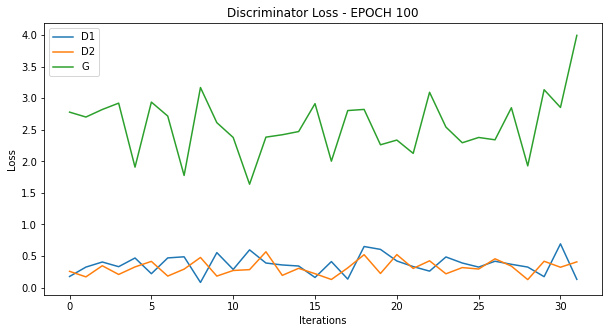

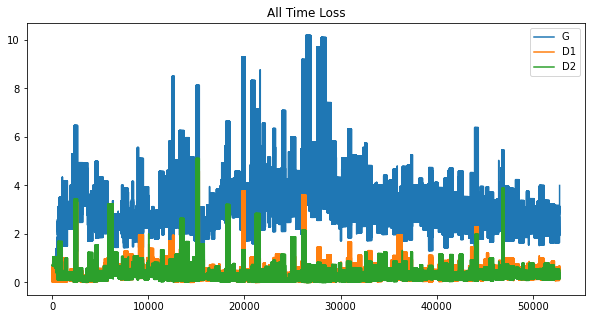

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 100/32, d1=0.349, d2=0.071, g=2.616
>1, 100/32, d1=0.534, d2=0.436, g=2.215
>2, 100/32, d1=0.145, d2=0.199, g=2.642
>3, 100/32, d1=0.439, d2=0.204, g=2.189
>4, 100/32, d1=0.275, d2=0.311, g=2.183
>5, 100/32, d1=0.098, d2=0.298, g=3.805
>6, 100/32, d1=0.706, d2=0.297, g=2.398
>7, 100/32, d1=0.465, d2=0.625, g=2.318
>8, 100/32, d1=0.311, d2=0.533, g=3.320
>9, 100/32, d1=0.723, d2=0.438, g=1.864
>10, 100/32, d1=0.301, d2=0.707, g=4.000
>11, 100/32, d1=0.954, d2=0.096, g=1.905
>12, 100/32, d1=0.255, d2=0.568, g=2.509
>13, 100/32, d1=0.629, d2=0.421, g=2.566
>14, 100/32, d1=0.566, d2=0.335, g=2.523
>15, 100/32, d1=0.229, d2=0.431, g=2.487
>16, 100/32, d1=0.247, d2=0.281, g=3.251
>17, 100/32, d1=0.598, d2=0.225, g=2.640
>18, 100/32, d1=0.357, d2=0.390, g=2.438
>19, 100/32, d1=0.129, d2=0.282, g=3.287
>20, 100/32, d1=0.459, d2=0.522, g=2.999
>21, 100/32, d1=0.903, d2=0.304, g=2.027
>22, 100/32, d1=0.108, d2=0.232, g=2.299
>23, 100/32, d1=0.260, d2=0.351, g=2.064
>24, 100/32, d1=0.366, d2=

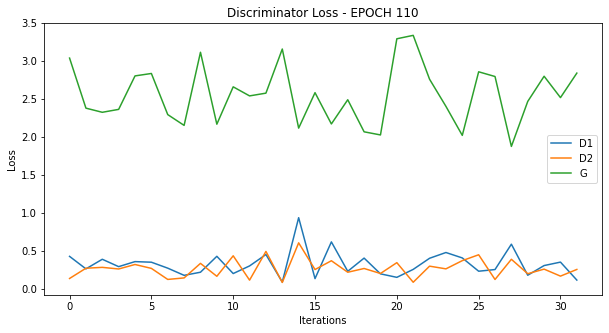

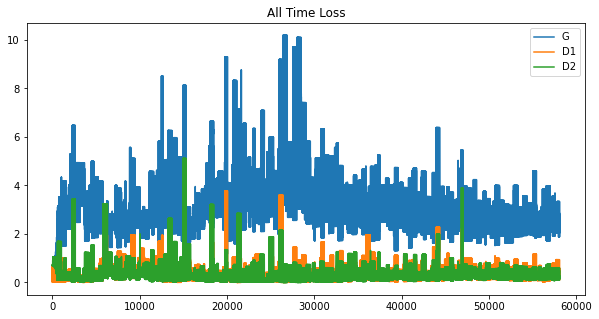

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 110/32, d1=0.298, d2=0.313, g=2.992
>1, 110/32, d1=0.409, d2=0.201, g=3.025
>2, 110/32, d1=0.283, d2=0.218, g=2.828
>3, 110/32, d1=0.211, d2=0.144, g=2.731
>4, 110/32, d1=0.120, d2=0.159, g=2.960
>5, 110/32, d1=0.210, d2=0.106, g=2.890
>6, 110/32, d1=0.163, d2=0.183, g=2.840
>7, 110/32, d1=0.477, d2=0.308, g=2.413
>8, 110/32, d1=0.228, d2=0.267, g=3.087
>9, 110/32, d1=0.380, d2=0.257, g=2.613
>10, 110/32, d1=0.202, d2=0.223, g=2.401
>11, 110/32, d1=0.132, d2=0.208, g=3.171
>12, 110/32, d1=0.514, d2=0.249, g=2.358
>13, 110/32, d1=0.346, d2=0.265, g=2.555
>14, 110/32, d1=0.151, d2=0.399, g=3.156
>15, 110/32, d1=0.796, d2=0.486, g=2.818
>16, 110/32, d1=0.243, d2=0.182, g=2.839
>17, 110/32, d1=0.295, d2=0.255, g=2.945
>18, 110/32, d1=0.219, d2=0.259, g=3.439
>19, 110/32, d1=0.189, d2=0.088, g=3.319
>20, 110/32, d1=0.492, d2=0.322, g=2.302
>21, 110/32, d1=0.121, d2=0.291, g=3.265
>22, 110/32, d1=0.707, d2=0.284, g=2.619
>23, 110/32, d1=0.255, d2=0.261, g=2.725
>24, 110/32, d1=0.130, d2=

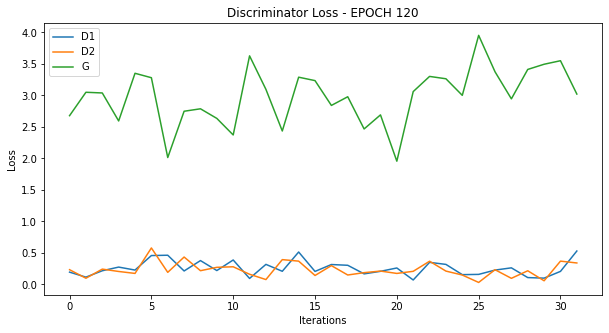

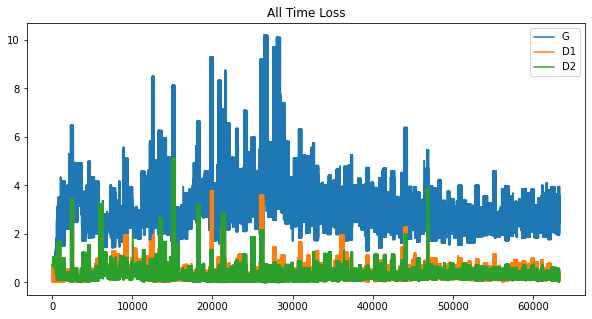

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 120/32, d1=0.343, d2=0.331, g=2.864
>1, 120/32, d1=0.331, d2=0.226, g=3.371
>2, 120/32, d1=0.409, d2=0.326, g=2.077
>3, 120/32, d1=0.241, d2=0.325, g=2.987
>4, 120/32, d1=0.541, d2=0.263, g=2.630
>5, 120/32, d1=0.114, d2=0.175, g=2.829
>6, 120/32, d1=0.266, d2=0.319, g=3.288
>7, 120/32, d1=0.335, d2=0.159, g=2.389
>8, 120/32, d1=0.144, d2=0.494, g=4.071
>9, 120/32, d1=0.468, d2=0.087, g=2.523
>10, 120/32, d1=0.307, d2=0.344, g=1.886
>11, 120/32, d1=0.102, d2=0.268, g=3.015
>12, 120/32, d1=0.357, d2=0.136, g=2.898
>13, 120/32, d1=0.321, d2=0.120, g=2.458
>14, 120/32, d1=0.206, d2=0.282, g=2.998
>15, 120/32, d1=0.113, d2=0.115, g=3.287
>16, 120/32, d1=0.472, d2=0.341, g=2.492
>17, 120/32, d1=0.207, d2=0.278, g=2.995
>18, 120/32, d1=0.506, d2=0.199, g=2.181
>19, 120/32, d1=0.254, d2=0.439, g=2.871
>20, 120/32, d1=0.338, d2=0.143, g=2.627
>21, 120/32, d1=0.255, d2=0.275, g=3.069
>22, 120/32, d1=0.232, d2=0.138, g=2.769
>23, 120/32, d1=0.057, d2=0.127, g=3.010
>24, 120/32, d1=0.429, d2=

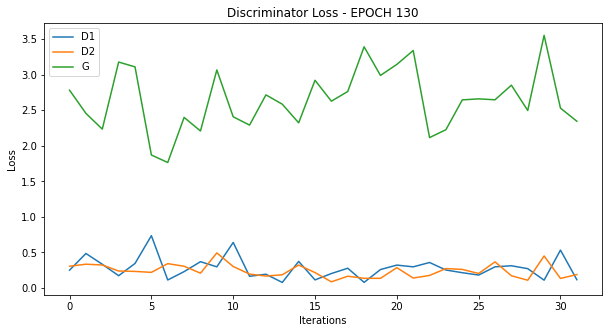

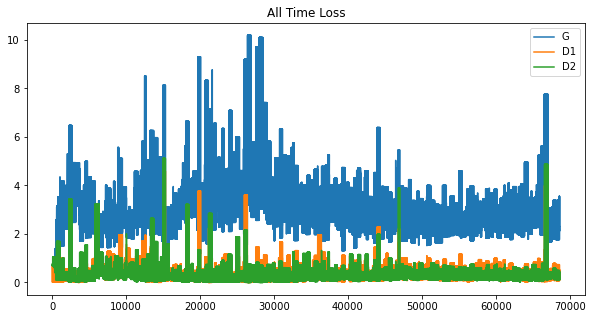

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 130/32, d1=0.239, d2=0.158, g=2.095
>1, 130/32, d1=0.291, d2=0.400, g=2.610
>2, 130/32, d1=0.230, d2=0.207, g=2.264
>3, 130/32, d1=0.181, d2=0.145, g=2.791
>4, 130/32, d1=0.267, d2=0.271, g=2.748
>5, 130/32, d1=0.255, d2=0.165, g=3.133
>6, 130/32, d1=0.404, d2=0.471, g=2.766
>7, 130/32, d1=0.251, d2=0.119, g=2.916
>8, 130/32, d1=0.351, d2=0.214, g=2.507
>9, 130/32, d1=0.129, d2=0.228, g=2.569
>10, 130/32, d1=0.439, d2=0.215, g=2.481
>11, 130/32, d1=0.304, d2=0.233, g=2.346
>12, 130/32, d1=0.287, d2=0.157, g=2.497
>13, 130/32, d1=0.228, d2=0.345, g=2.904
>14, 130/32, d1=0.296, d2=0.227, g=3.431
>15, 130/32, d1=0.429, d2=0.195, g=2.364
>16, 130/32, d1=0.131, d2=0.488, g=3.051
>17, 130/32, d1=0.288, d2=0.178, g=3.365
>18, 130/32, d1=0.526, d2=0.154, g=2.640
>19, 130/32, d1=0.178, d2=0.356, g=2.910
>20, 130/32, d1=0.278, d2=0.269, g=2.930
>21, 130/32, d1=0.699, d2=0.290, g=2.158
>22, 130/32, d1=0.219, d2=0.380, g=2.887
>23, 130/32, d1=0.217, d2=0.189, g=3.120
>24, 130/32, d1=0.452, d2=

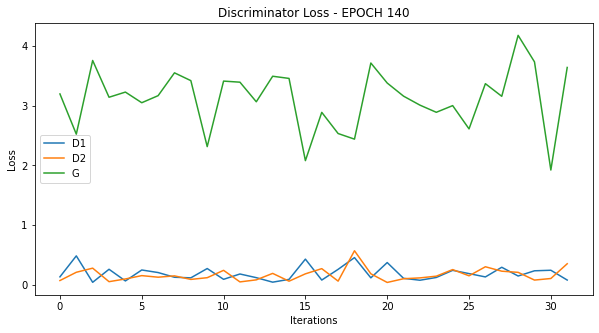

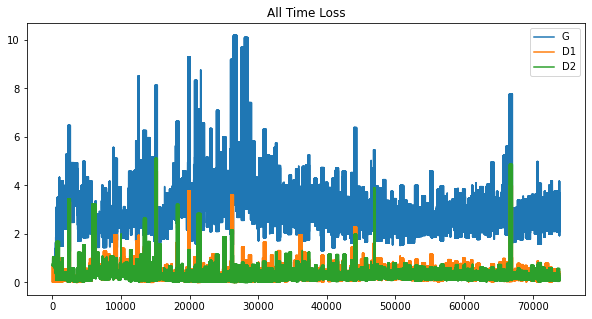

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 140/32, d1=0.264, d2=0.117, g=3.174
>1, 140/32, d1=0.069, d2=0.242, g=4.095
>2, 140/32, d1=0.232, d2=0.131, g=3.403
>3, 140/32, d1=0.432, d2=0.206, g=2.850
>4, 140/32, d1=0.167, d2=0.267, g=3.868
>5, 140/32, d1=0.503, d2=0.206, g=2.584
>6, 140/32, d1=0.392, d2=0.333, g=2.339
>7, 140/32, d1=0.163, d2=0.211, g=3.055
>8, 140/32, d1=0.189, d2=0.170, g=3.762
>9, 140/32, d1=0.474, d2=0.169, g=2.406
>10, 140/32, d1=0.094, d2=0.135, g=3.098
>11, 140/32, d1=0.184, d2=0.272, g=3.791
>12, 140/32, d1=0.279, d2=0.100, g=2.856
>13, 140/32, d1=0.095, d2=0.265, g=3.638
>14, 140/32, d1=0.263, d2=0.172, g=3.328
>15, 140/32, d1=0.246, d2=0.315, g=3.438
>16, 140/32, d1=0.311, d2=0.306, g=3.363
>17, 140/32, d1=0.323, d2=0.209, g=2.552
>18, 140/32, d1=0.112, d2=0.086, g=3.773
>19, 140/32, d1=0.215, d2=0.193, g=2.866
>20, 140/32, d1=0.295, d2=0.209, g=2.905
>21, 140/32, d1=0.208, d2=0.081, g=2.595
>22, 140/32, d1=0.390, d2=0.860, g=3.266
>23, 140/32, d1=0.606, d2=0.227, g=2.492
>24, 140/32, d1=0.076, d2=

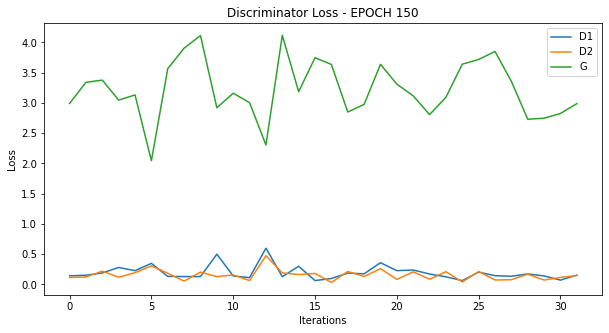

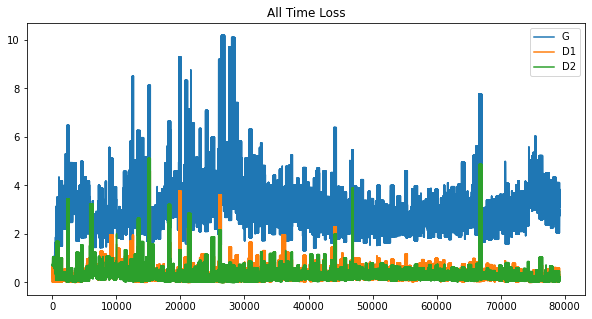

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 150/32, d1=0.216, d2=0.265, g=3.596
>1, 150/32, d1=0.105, d2=0.038, g=3.900
>2, 150/32, d1=0.282, d2=0.087, g=2.942
>3, 150/32, d1=0.152, d2=0.235, g=3.273
>4, 150/32, d1=0.345, d2=0.703, g=3.587
>5, 150/32, d1=0.252, d2=0.035, g=4.093
>6, 150/32, d1=0.478, d2=0.276, g=2.884
>7, 150/32, d1=0.077, d2=0.128, g=3.589
>8, 150/32, d1=0.397, d2=0.078, g=2.811
>9, 150/32, d1=0.109, d2=0.141, g=2.945
>10, 150/32, d1=0.073, d2=0.116, g=2.711
>11, 150/32, d1=0.208, d2=0.097, g=2.628
>12, 150/32, d1=0.114, d2=0.166, g=2.904
>13, 150/32, d1=0.173, d2=0.113, g=2.412
>14, 150/32, d1=0.114, d2=0.280, g=3.014
>15, 150/32, d1=0.042, d2=0.103, g=4.360
>16, 150/32, d1=0.384, d2=0.043, g=2.844
>17, 150/32, d1=0.046, d2=0.537, g=5.953
>18, 150/32, d1=0.625, d2=0.039, g=4.147
>19, 150/32, d1=0.788, d2=0.201, g=2.189
>20, 150/32, d1=0.225, d2=0.424, g=3.458
>21, 150/32, d1=0.103, d2=0.051, g=3.827
>22, 150/32, d1=0.165, d2=0.042, g=3.215
>23, 150/32, d1=0.085, d2=0.162, g=3.647
>24, 150/32, d1=0.428, d2=

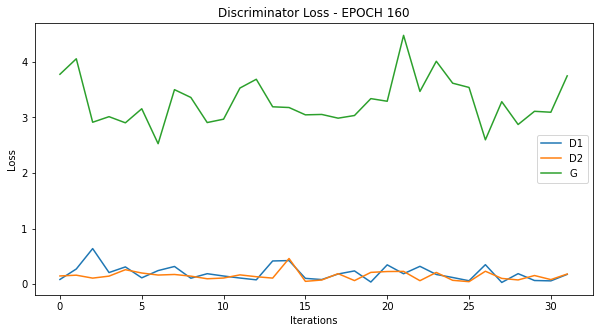

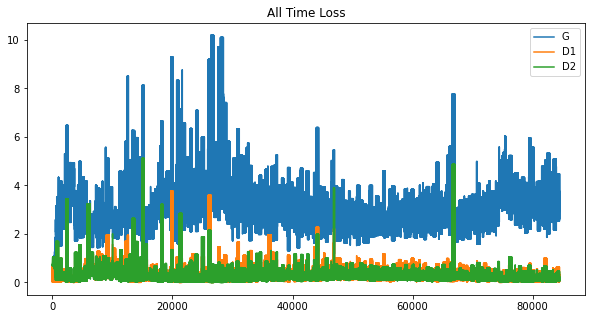

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 160/32, d1=0.353, d2=0.117, g=3.486
>1, 160/32, d1=0.212, d2=0.044, g=3.143
>2, 160/32, d1=0.097, d2=0.162, g=3.470
>3, 160/32, d1=0.259, d2=0.305, g=3.232
>4, 160/32, d1=0.070, d2=0.079, g=4.050
>5, 160/32, d1=0.231, d2=0.080, g=3.383
>6, 160/32, d1=0.081, d2=0.092, g=3.349
>7, 160/32, d1=0.097, d2=0.081, g=3.540
>8, 160/32, d1=0.067, d2=0.087, g=4.057
>9, 160/32, d1=0.123, d2=0.045, g=3.247
>10, 160/32, d1=0.093, d2=0.142, g=3.630
>11, 160/32, d1=0.169, d2=0.076, g=3.358
>12, 160/32, d1=0.191, d2=0.150, g=3.646
>13, 160/32, d1=0.120, d2=0.082, g=3.044
>14, 160/32, d1=0.264, d2=0.155, g=3.268
>15, 160/32, d1=0.110, d2=0.157, g=3.305
>16, 160/32, d1=0.315, d2=0.114, g=2.824
>17, 160/32, d1=0.169, d2=0.426, g=4.247
>18, 160/32, d1=0.342, d2=0.087, g=3.601
>19, 160/32, d1=0.189, d2=0.205, g=3.691
>20, 160/32, d1=0.367, d2=0.199, g=3.156
>21, 160/32, d1=0.245, d2=0.188, g=4.086
>22, 160/32, d1=0.015, d2=0.059, g=10.774
>23, 160/32, d1=3.288, d2=0.652, g=17.797
>24, 160/32, d1=14.411, 

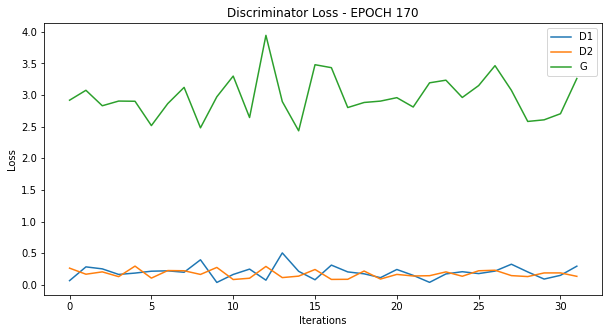

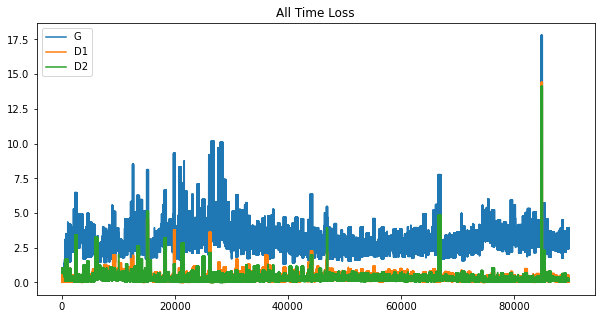

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 170/32, d1=0.100, d2=0.067, g=3.712
>1, 170/32, d1=0.166, d2=0.098, g=2.834
>2, 170/32, d1=0.146, d2=0.224, g=2.652
>3, 170/32, d1=0.146, d2=0.099, g=3.031
>4, 170/32, d1=0.393, d2=0.279, g=2.329
>5, 170/32, d1=0.048, d2=0.283, g=3.867
>6, 170/32, d1=0.078, d2=0.031, g=3.294
>7, 170/32, d1=0.445, d2=0.331, g=3.708
>8, 170/32, d1=0.161, d2=0.110, g=3.419
>9, 170/32, d1=0.059, d2=0.188, g=3.546
>10, 170/32, d1=0.083, d2=0.211, g=5.190
>11, 170/32, d1=0.646, d2=0.205, g=2.501
>12, 170/32, d1=0.093, d2=0.504, g=3.397
>13, 170/32, d1=0.197, d2=0.136, g=3.592
>14, 170/32, d1=0.380, d2=0.193, g=2.984
>15, 170/32, d1=0.454, d2=0.216, g=2.360
>16, 170/32, d1=0.136, d2=0.616, g=3.809
>17, 170/32, d1=0.500, d2=0.228, g=3.009
>18, 170/32, d1=0.209, d2=0.197, g=3.045
>19, 170/32, d1=0.063, d2=0.093, g=3.365
>20, 170/32, d1=0.316, d2=0.265, g=2.708
>21, 170/32, d1=0.074, d2=0.145, g=3.651
>22, 170/32, d1=0.672, d2=0.443, g=2.539
>23, 170/32, d1=0.201, d2=0.442, g=3.631
>24, 170/32, d1=0.499, d2=

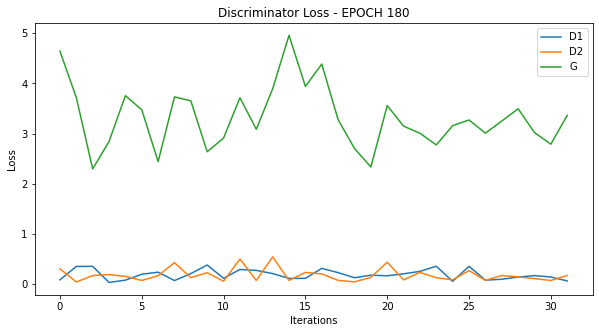

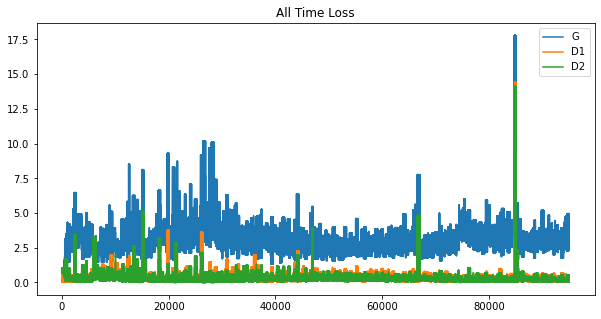

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 180/32, d1=0.087, d2=0.038, g=3.989
>1, 180/32, d1=0.225, d2=0.232, g=4.330
>2, 180/32, d1=0.272, d2=0.063, g=2.850
>3, 180/32, d1=0.142, d2=0.253, g=3.045
>4, 180/32, d1=0.034, d2=0.113, g=3.640
>5, 180/32, d1=0.126, d2=0.043, g=3.598
>6, 180/32, d1=0.033, d2=0.082, g=3.639
>7, 180/32, d1=0.192, d2=0.105, g=2.881
>8, 180/32, d1=0.205, d2=0.122, g=2.922
>9, 180/32, d1=0.052, d2=0.217, g=3.328
>10, 180/32, d1=0.265, d2=0.098, g=3.214
>11, 180/32, d1=0.229, d2=0.189, g=3.031
>12, 180/32, d1=0.122, d2=0.092, g=3.324
>13, 180/32, d1=0.122, d2=0.072, g=3.130
>14, 180/32, d1=0.077, d2=0.161, g=3.272
>15, 180/32, d1=0.028, d2=0.047, g=3.928
>16, 180/32, d1=0.130, d2=0.195, g=4.529
>17, 180/32, d1=0.305, d2=0.021, g=3.222
>18, 180/32, d1=0.062, d2=0.164, g=3.554
>19, 180/32, d1=0.130, d2=0.168, g=3.909
>20, 180/32, d1=0.039, d2=0.026, g=4.429
>21, 180/32, d1=0.165, d2=0.124, g=3.674
>22, 180/32, d1=0.086, d2=0.079, g=3.916
>23, 180/32, d1=0.040, d2=0.053, g=3.998
>24, 180/32, d1=0.161, d2=

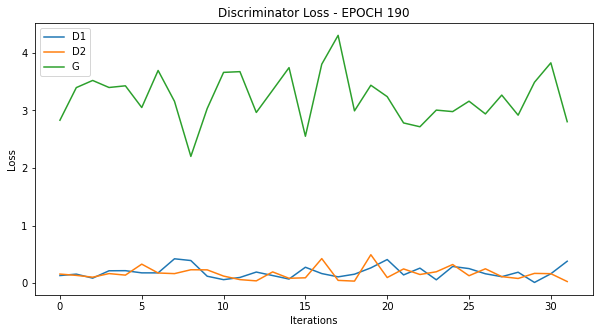

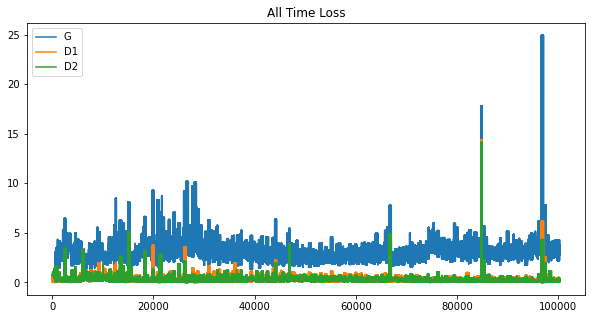

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 190/32, d1=0.240, d2=0.211, g=2.612
>1, 190/32, d1=0.058, d2=0.147, g=3.531
>2, 190/32, d1=0.109, d2=0.139, g=2.778
>3, 190/32, d1=0.211, d2=0.245, g=2.878
>4, 190/32, d1=0.091, d2=0.075, g=3.435
>5, 190/32, d1=0.173, d2=0.198, g=3.329
>6, 190/32, d1=0.140, d2=0.138, g=3.744
>7, 190/32, d1=0.215, d2=0.106, g=2.965
>8, 190/32, d1=0.122, d2=0.150, g=3.706
>9, 190/32, d1=0.138, d2=0.212, g=3.697
>10, 190/32, d1=0.161, d2=0.054, g=4.049
>11, 190/32, d1=0.187, d2=0.072, g=3.002
>12, 190/32, d1=0.227, d2=0.107, g=2.274
>13, 190/32, d1=0.023, d2=0.542, g=3.740
>14, 190/32, d1=0.160, d2=0.096, g=5.046
>15, 190/32, d1=1.367, d2=0.327, g=2.138
>16, 190/32, d1=0.070, d2=0.376, g=2.814
>17, 190/32, d1=0.136, d2=0.231, g=3.625
>18, 190/32, d1=0.228, d2=0.079, g=3.173
>19, 190/32, d1=0.191, d2=0.192, g=3.356
>20, 190/32, d1=0.046, d2=0.098, g=3.531
>21, 190/32, d1=0.087, d2=0.089, g=3.901
>22, 190/32, d1=0.217, d2=0.083, g=3.310
>23, 190/32, d1=0.314, d2=0.204, g=3.035
>24, 190/32, d1=0.059, d2=

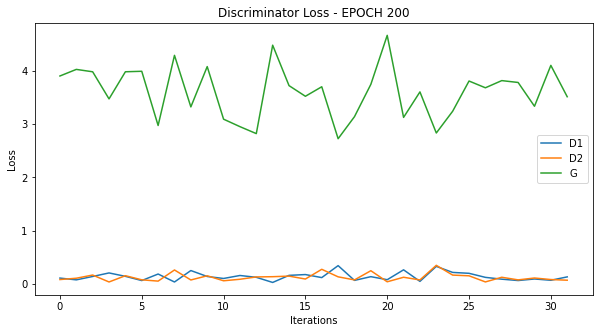

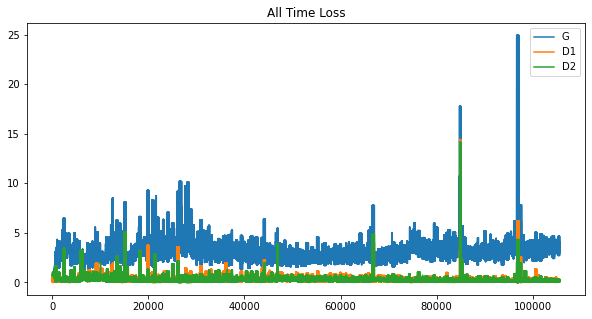

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 200/32, d1=0.140, d2=0.208, g=2.989
>1, 200/32, d1=0.025, d2=0.177, g=4.396
>2, 200/32, d1=0.247, d2=0.043, g=3.676
>3, 200/32, d1=0.281, d2=0.248, g=3.173
>4, 200/32, d1=0.030, d2=0.159, g=4.008
>5, 200/32, d1=0.174, d2=0.045, g=3.288
>6, 200/32, d1=0.243, d2=0.251, g=3.473
>7, 200/32, d1=0.106, d2=0.086, g=3.478
>8, 200/32, d1=0.138, d2=0.101, g=5.807
>9, 200/32, d1=0.469, d2=0.070, g=4.028
>10, 200/32, d1=0.014, d2=0.119, g=3.862
>11, 200/32, d1=0.013, d2=0.086, g=5.708
>12, 200/32, d1=0.013, d2=0.013, g=6.180
>13, 200/32, d1=0.010, d2=0.011, g=5.119
>14, 200/32, d1=0.010, d2=0.068, g=4.344
>15, 200/32, d1=0.013, d2=0.026, g=4.670
>16, 200/32, d1=0.106, d2=0.155, g=4.492
>17, 200/32, d1=0.060, d2=0.031, g=4.909
>18, 200/32, d1=0.044, d2=0.037, g=4.645
>19, 200/32, d1=0.029, d2=0.022, g=4.096
>20, 200/32, d1=0.011, d2=0.028, g=4.357
>21, 200/32, d1=0.007, d2=0.021, g=4.747
>22, 200/32, d1=0.031, d2=0.020, g=3.901
>23, 200/32, d1=0.003, d2=0.017, g=4.300
>24, 200/32, d1=0.036, d2=

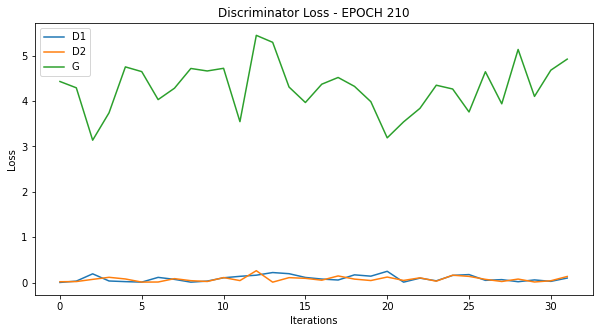

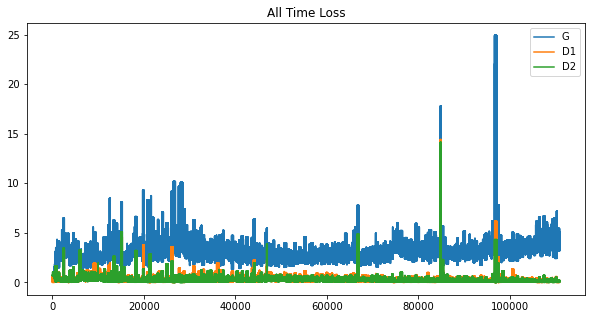

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 210/32, d1=0.219, d2=0.032, g=3.916
>1, 210/32, d1=0.001, d2=0.049, g=4.349
>2, 210/32, d1=0.065, d2=0.040, g=4.104
>3, 210/32, d1=0.017, d2=0.037, g=4.222
>4, 210/32, d1=0.034, d2=0.033, g=4.766
>5, 210/32, d1=0.011, d2=0.069, g=5.337
>6, 210/32, d1=0.060, d2=0.025, g=5.140
>7, 210/32, d1=0.387, d2=0.341, g=3.070
>8, 210/32, d1=0.002, d2=0.134, g=4.926
>9, 210/32, d1=0.025, d2=0.029, g=4.593
>10, 210/32, d1=0.183, d2=0.049, g=4.213
>11, 210/32, d1=0.126, d2=0.056, g=3.572
>12, 210/32, d1=0.225, d2=0.186, g=4.543
>13, 210/32, d1=0.265, d2=0.090, g=4.062
>14, 210/32, d1=0.114, d2=0.201, g=4.132
>15, 210/32, d1=0.021, d2=0.034, g=4.030
>16, 210/32, d1=0.175, d2=0.035, g=3.034
>17, 210/32, d1=0.192, d2=0.294, g=3.977
>18, 210/32, d1=0.043, d2=0.032, g=5.751
>19, 210/32, d1=0.354, d2=0.076, g=2.803
>20, 210/32, d1=0.069, d2=0.261, g=3.513
>21, 210/32, d1=0.076, d2=0.072, g=4.770
>22, 210/32, d1=0.433, d2=0.194, g=3.706
>23, 210/32, d1=0.068, d2=0.094, g=3.329
>24, 210/32, d1=0.123, d2=

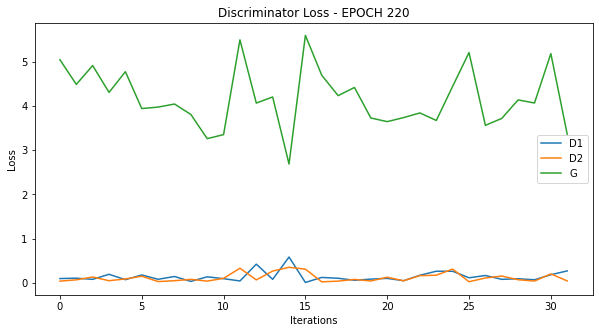

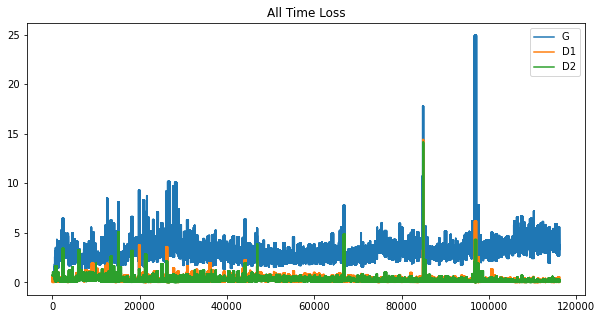

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 220/32, d1=0.123, d2=0.362, g=4.321
>1, 220/32, d1=0.088, d2=0.037, g=4.759
>2, 220/32, d1=0.223, d2=0.111, g=3.833
>3, 220/32, d1=0.103, d2=0.041, g=2.854
>4, 220/32, d1=0.014, d2=0.100, g=3.832
>5, 220/32, d1=0.078, d2=0.197, g=4.935
>6, 220/32, d1=0.476, d2=0.181, g=3.462
>7, 220/32, d1=0.009, d2=0.170, g=5.111
>8, 220/32, d1=0.255, d2=0.079, g=3.912
>9, 220/32, d1=0.124, d2=0.132, g=3.101
>10, 220/32, d1=0.100, d2=0.172, g=4.478
>11, 220/32, d1=0.144, d2=0.137, g=4.872
>12, 220/32, d1=0.130, d2=0.041, g=4.378
>13, 220/32, d1=0.376, d2=0.409, g=3.597
>14, 220/32, d1=0.001, d2=0.075, g=4.675
>15, 220/32, d1=0.153, d2=0.028, g=3.564
>16, 220/32, d1=0.028, d2=0.269, g=4.841
>17, 220/32, d1=0.628, d2=0.205, g=2.374
>18, 220/32, d1=0.029, d2=0.483, g=5.120
>19, 220/32, d1=0.116, d2=0.006, g=5.323
>20, 220/32, d1=0.176, d2=0.034, g=3.852
>21, 220/32, d1=0.249, d2=0.128, g=3.116
>22, 220/32, d1=0.072, d2=0.364, g=4.126
>23, 220/32, d1=0.208, d2=0.051, g=4.285
>24, 220/32, d1=0.062, d2=

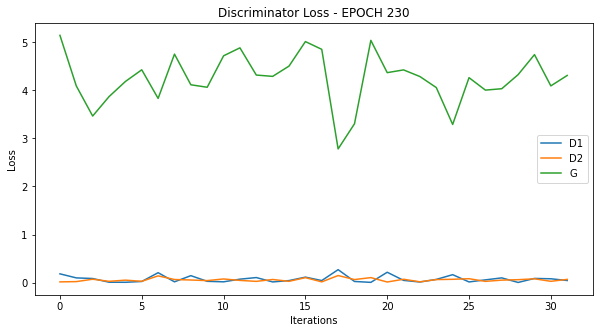

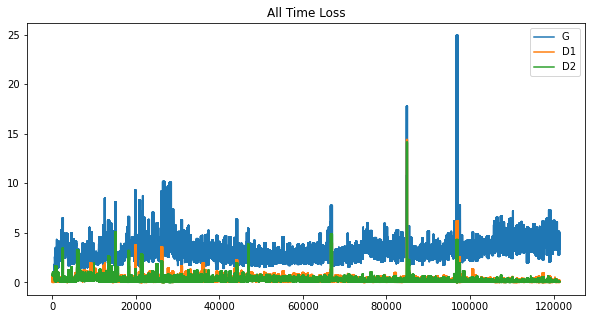

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 230/32, d1=0.037, d2=0.190, g=5.261
>1, 230/32, d1=0.216, d2=0.050, g=4.643
>2, 230/32, d1=0.084, d2=0.100, g=4.580
>3, 230/32, d1=0.057, d2=0.023, g=5.005
>4, 230/32, d1=0.091, d2=0.033, g=3.645
>5, 230/32, d1=0.050, d2=0.168, g=4.138
>6, 230/32, d1=0.058, d2=0.009, g=4.299
>7, 230/32, d1=0.061, d2=0.018, g=3.590
>8, 230/32, d1=0.033, d2=0.092, g=4.481
>9, 230/32, d1=0.001, d2=0.012, g=5.472
>10, 230/32, d1=0.040, d2=0.013, g=5.208
>11, 230/32, d1=0.083, d2=0.019, g=3.424
>12, 230/32, d1=0.008, d2=0.165, g=4.849
>13, 230/32, d1=0.065, d2=0.029, g=5.666
>14, 230/32, d1=0.349, d2=0.040, g=3.966
>15, 230/32, d1=0.029, d2=0.080, g=4.421
>16, 230/32, d1=0.039, d2=0.088, g=4.543
>17, 230/32, d1=0.107, d2=0.115, g=4.601
>18, 230/32, d1=0.086, d2=0.023, g=4.596
>19, 230/32, d1=0.065, d2=0.039, g=4.192
>20, 230/32, d1=0.073, d2=0.068, g=4.056
>21, 230/32, d1=0.080, d2=0.038, g=3.878
>22, 230/32, d1=0.204, d2=0.230, g=4.303
>23, 230/32, d1=0.029, d2=0.029, g=4.977
>24, 230/32, d1=0.106, d2=

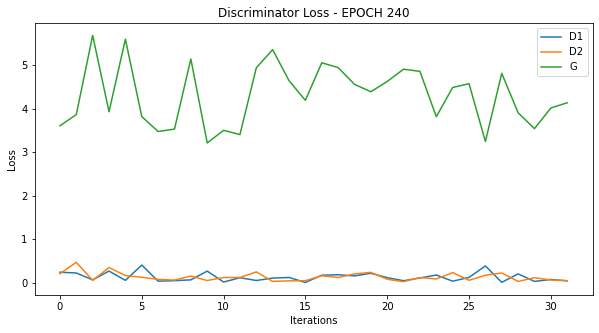

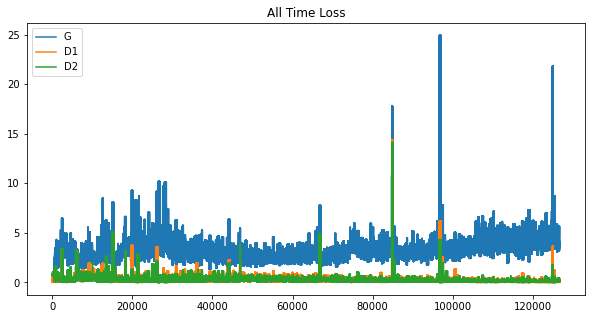

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 240/32, d1=0.120, d2=0.187, g=4.097
>1, 240/32, d1=0.004, d2=0.031, g=4.949
>2, 240/32, d1=0.630, d2=0.471, g=3.335
>3, 240/32, d1=0.009, d2=0.130, g=4.722
>4, 240/32, d1=0.263, d2=0.257, g=4.094
>5, 240/32, d1=0.139, d2=0.098, g=3.072
>6, 240/32, d1=0.105, d2=0.425, g=5.192
>7, 240/32, d1=0.200, d2=0.025, g=4.328
>8, 240/32, d1=0.112, d2=0.376, g=3.814
>9, 240/32, d1=0.041, d2=0.023, g=4.251
>10, 240/32, d1=0.181, d2=0.247, g=4.409
>11, 240/32, d1=0.091, d2=0.054, g=5.068
>12, 240/32, d1=0.100, d2=0.022, g=3.787
>13, 240/32, d1=0.135, d2=0.133, g=3.470
>14, 240/32, d1=0.009, d2=0.080, g=4.300
>15, 240/32, d1=0.069, d2=0.032, g=4.228
>16, 240/32, d1=0.032, d2=0.055, g=4.272
>17, 240/32, d1=0.156, d2=0.072, g=4.158
>18, 240/32, d1=0.117, d2=0.102, g=4.060
>19, 240/32, d1=0.208, d2=0.360, g=3.913
>20, 240/32, d1=0.021, d2=0.012, g=4.755
>21, 240/32, d1=0.159, d2=0.123, g=4.902
>22, 240/32, d1=0.120, d2=0.017, g=4.915
>23, 240/32, d1=0.119, d2=0.164, g=4.603
>24, 240/32, d1=0.061, d2=

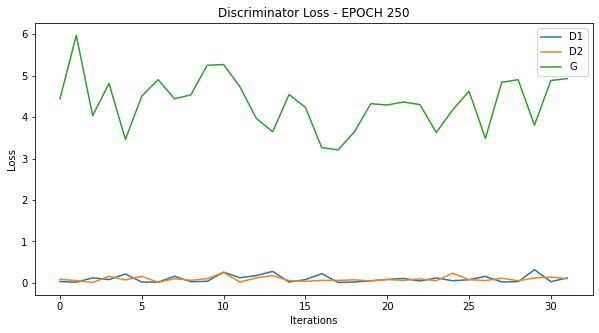

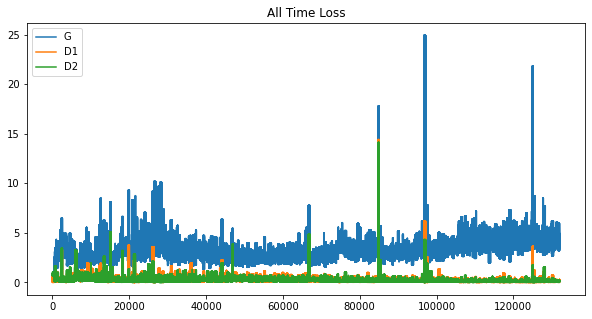

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 250/32, d1=0.331, d2=0.075, g=2.708
>1, 250/32, d1=0.017, d2=0.150, g=3.958
>2, 250/32, d1=0.081, d2=0.081, g=4.037
>3, 250/32, d1=0.028, d2=0.026, g=4.459
>4, 250/32, d1=0.123, d2=0.038, g=3.708
>5, 250/32, d1=0.058, d2=0.054, g=3.843
>6, 250/32, d1=0.023, d2=0.043, g=3.494
>7, 250/32, d1=0.123, d2=0.703, g=6.031
>8, 250/32, d1=0.371, d2=0.165, g=5.200
>9, 250/32, d1=0.170, d2=0.069, g=3.597
>10, 250/32, d1=0.033, d2=0.178, g=4.561
>11, 250/32, d1=0.069, d2=0.078, g=5.394
>12, 250/32, d1=0.241, d2=0.029, g=3.642
>13, 250/32, d1=0.198, d2=0.173, g=3.704
>14, 250/32, d1=0.055, d2=0.149, g=4.955
>15, 250/32, d1=0.123, d2=0.043, g=4.510
>16, 250/32, d1=0.155, d2=0.045, g=3.678
>17, 250/32, d1=0.044, d2=0.055, g=3.520
>18, 250/32, d1=0.028, d2=0.043, g=3.382
>19, 250/32, d1=0.015, d2=0.085, g=3.917
>20, 250/32, d1=0.020, d2=0.024, g=4.879
>21, 250/32, d1=0.174, d2=0.126, g=3.931
>22, 250/32, d1=0.080, d2=0.212, g=4.177
>23, 250/32, d1=0.079, d2=0.124, g=4.370
>24, 250/32, d1=0.032, d2=

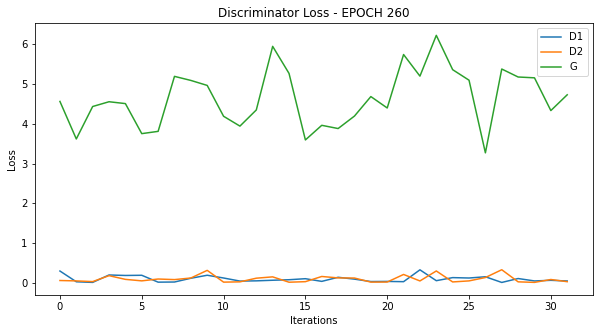

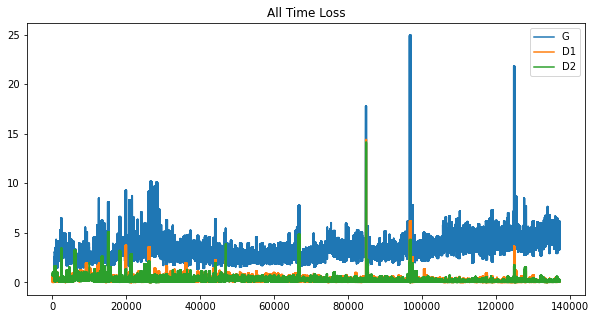

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 260/32, d1=0.039, d2=0.055, g=4.637
>1, 260/32, d1=0.022, d2=0.272, g=6.806
>2, 260/32, d1=0.464, d2=0.063, g=4.115
>3, 260/32, d1=0.053, d2=0.231, g=5.108
>4, 260/32, d1=0.322, d2=0.032, g=4.465
>5, 260/32, d1=0.062, d2=0.294, g=4.913
>6, 260/32, d1=0.034, d2=0.016, g=6.900
>7, 260/32, d1=0.358, d2=0.031, g=6.912
>8, 260/32, d1=0.426, d2=0.795, g=5.096
>9, 260/32, d1=0.213, d2=0.050, g=5.870
>10, 260/32, d1=0.378, d2=0.037, g=3.013
>11, 260/32, d1=0.071, d2=0.727, g=5.818
>12, 260/32, d1=0.412, d2=0.135, g=4.866
>13, 260/32, d1=0.271, d2=0.213, g=3.168
>14, 260/32, d1=0.137, d2=0.085, g=3.345
>15, 260/32, d1=0.035, d2=0.141, g=3.983
>16, 260/32, d1=0.178, d2=0.146, g=3.461
>17, 260/32, d1=0.021, d2=0.192, g=5.869
>18, 260/32, d1=0.180, d2=0.068, g=4.704
>19, 260/32, d1=0.143, d2=0.431, g=5.440
>20, 260/32, d1=0.267, d2=0.138, g=4.976
>21, 260/32, d1=0.109, d2=0.040, g=4.330
>22, 260/32, d1=0.052, d2=0.354, g=5.827
>23, 260/32, d1=0.350, d2=0.037, g=4.131
>24, 260/32, d1=0.174, d2=

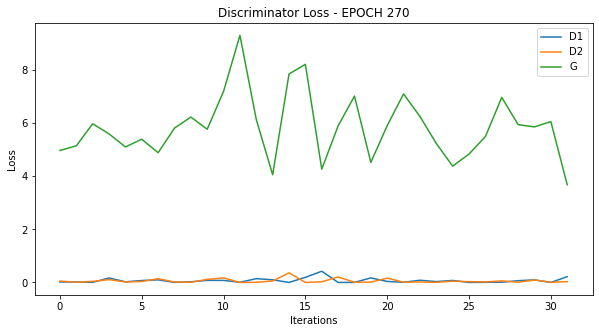

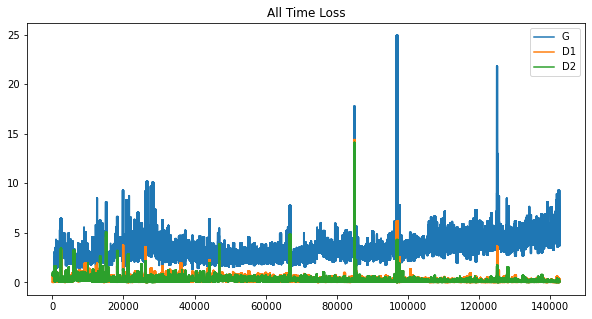

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 270/32, d1=0.001, d2=0.415, g=7.047
>1, 270/32, d1=0.259, d2=0.010, g=4.391
>2, 270/32, d1=0.017, d2=0.034, g=4.411
>3, 270/32, d1=0.047, d2=0.054, g=4.057
>4, 270/32, d1=0.008, d2=0.022, g=4.920
>5, 270/32, d1=0.128, d2=0.064, g=4.247
>6, 270/32, d1=0.011, d2=0.067, g=4.614
>7, 270/32, d1=0.012, d2=0.008, g=5.685
>8, 270/32, d1=0.006, d2=0.017, g=5.034
>9, 270/32, d1=0.084, d2=0.027, g=4.020
>10, 270/32, d1=0.007, d2=0.049, g=5.720
>11, 270/32, d1=0.032, d2=0.055, g=6.025
>12, 270/32, d1=0.040, d2=0.004, g=6.341
>13, 270/32, d1=0.086, d2=0.043, g=4.191
>14, 270/32, d1=0.003, d2=0.131, g=6.252
>15, 270/32, d1=0.040, d2=0.005, g=7.044
>16, 270/32, d1=0.102, d2=0.018, g=5.302
>17, 270/32, d1=0.078, d2=0.110, g=4.660
>18, 270/32, d1=0.100, d2=0.034, g=4.008
>19, 270/32, d1=0.007, d2=0.028, g=4.628
>20, 270/32, d1=0.086, d2=0.348, g=5.987
>21, 270/32, d1=0.121, d2=0.014, g=6.158
>22, 270/32, d1=0.039, d2=0.016, g=5.438
>23, 270/32, d1=0.054, d2=0.199, g=5.956
>24, 270/32, d1=0.033, d2=

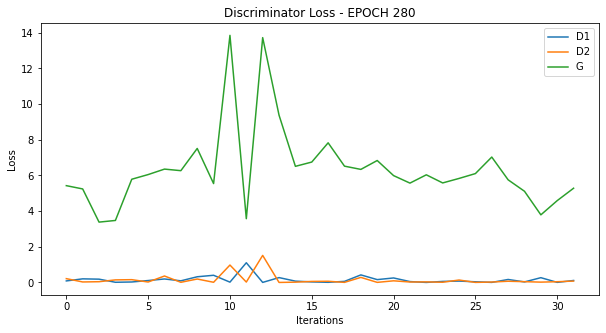

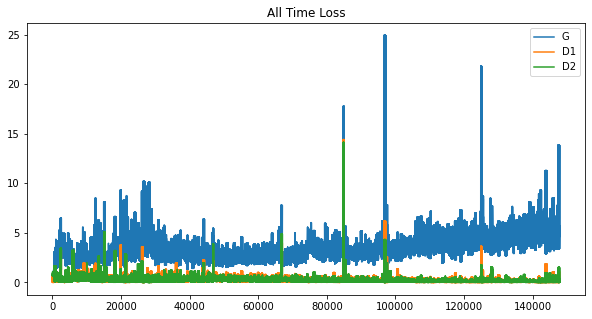

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 280/32, d1=0.063, d2=0.034, g=5.591
>1, 280/32, d1=0.046, d2=0.042, g=5.603
>2, 280/32, d1=0.004, d2=0.039, g=6.856
>3, 280/32, d1=0.012, d2=0.005, g=6.090
>4, 280/32, d1=0.009, d2=0.002, g=5.928
>5, 280/32, d1=0.027, d2=0.024, g=5.657
>6, 280/32, d1=0.125, d2=0.025, g=3.967
>7, 280/32, d1=0.002, d2=0.045, g=3.954
>8, 280/32, d1=0.005, d2=0.028, g=5.346
>9, 280/32, d1=0.111, d2=0.065, g=4.856
>10, 280/32, d1=0.007, d2=0.001, g=6.067
>11, 280/32, d1=0.018, d2=0.033, g=5.926
>12, 280/32, d1=0.015, d2=0.005, g=6.121
>13, 280/32, d1=0.081, d2=0.008, g=5.516
>14, 280/32, d1=0.016, d2=0.022, g=5.355
>15, 280/32, d1=0.013, d2=0.089, g=5.709
>16, 280/32, d1=0.005, d2=0.004, g=6.865
>17, 280/32, d1=0.072, d2=0.030, g=6.459
>18, 280/32, d1=0.028, d2=0.004, g=5.460
>19, 280/32, d1=0.084, d2=0.063, g=4.291
>20, 280/32, d1=0.087, d2=0.061, g=5.970
>21, 280/32, d1=0.022, d2=0.004, g=6.006
>22, 280/32, d1=0.087, d2=0.028, g=4.458
>23, 280/32, d1=0.016, d2=0.014, g=4.531
>24, 280/32, d1=0.017, d2=

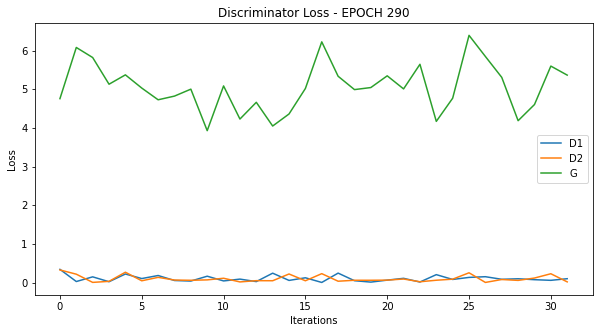

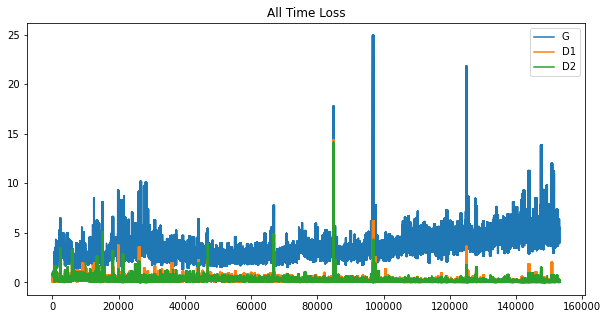

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 290/32, d1=0.008, d2=0.093, g=5.188
>1, 290/32, d1=0.147, d2=0.129, g=4.738
>2, 290/32, d1=0.100, d2=0.028, g=5.006
>3, 290/32, d1=0.062, d2=0.157, g=5.188
>4, 290/32, d1=0.038, d2=0.021, g=5.407
>5, 290/32, d1=0.147, d2=0.031, g=4.477
>6, 290/32, d1=0.013, d2=0.095, g=4.478
>7, 290/32, d1=0.295, d2=0.865, g=5.338
>8, 290/32, d1=0.133, d2=0.015, g=5.603
>9, 290/32, d1=0.055, d2=0.009, g=4.350
>10, 290/32, d1=0.092, d2=0.051, g=3.435
>11, 290/32, d1=0.006, d2=0.060, g=4.223
>12, 290/32, d1=0.044, d2=0.052, g=4.467
>13, 290/32, d1=0.071, d2=0.028, g=3.733
>14, 290/32, d1=0.024, d2=0.039, g=4.473
>15, 290/32, d1=0.062, d2=0.084, g=5.121
>16, 290/32, d1=0.125, d2=0.041, g=4.172
>17, 290/32, d1=0.058, d2=0.164, g=4.672
>18, 290/32, d1=0.068, d2=0.111, g=5.861
>19, 290/32, d1=0.232, d2=0.025, g=4.401
>20, 290/32, d1=0.193, d2=0.065, g=4.082
>21, 290/32, d1=0.051, d2=0.345, g=5.827
>22, 290/32, d1=0.375, d2=0.131, g=4.252
>23, 290/32, d1=0.125, d2=0.032, g=4.055
>24, 290/32, d1=0.014, d2=

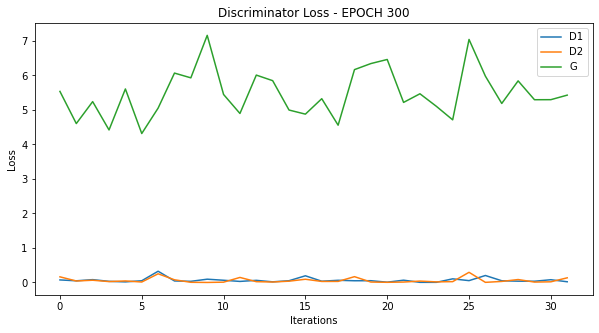

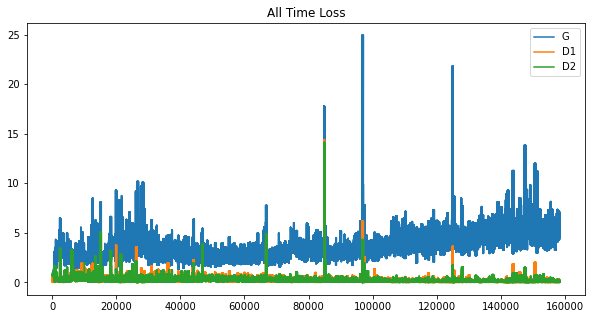

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 300/32, d1=0.024, d2=0.004, g=5.776
>1, 300/32, d1=0.022, d2=0.005, g=6.318
>2, 300/32, d1=0.039, d2=0.012, g=5.129
>3, 300/32, d1=0.013, d2=0.022, g=4.860
>4, 300/32, d1=0.004, d2=0.035, g=6.043
>5, 300/32, d1=0.028, d2=0.011, g=6.006
>6, 300/32, d1=0.026, d2=0.190, g=5.856
>7, 300/32, d1=0.615, d2=0.081, g=3.406
>8, 300/32, d1=0.001, d2=0.240, g=5.572
>9, 300/32, d1=0.059, d2=0.036, g=5.830
>10, 300/32, d1=0.074, d2=0.025, g=5.720
>11, 300/32, d1=0.221, d2=0.064, g=5.525
>12, 300/32, d1=0.077, d2=0.192, g=5.665
>13, 300/32, d1=0.011, d2=0.054, g=7.226
>14, 300/32, d1=0.143, d2=0.010, g=5.303
>15, 300/32, d1=0.019, d2=0.011, g=4.736
>16, 300/32, d1=0.073, d2=0.102, g=4.848
>17, 300/32, d1=0.203, d2=0.020, g=4.745
>18, 300/32, d1=0.008, d2=0.019, g=4.931
>19, 300/32, d1=0.021, d2=0.046, g=5.024
>20, 300/32, d1=0.009, d2=0.196, g=8.158
>21, 300/32, d1=0.407, d2=0.025, g=5.438
>22, 300/32, d1=0.044, d2=0.022, g=4.945
>23, 300/32, d1=0.087, d2=0.349, g=6.273
>24, 300/32, d1=0.071, d2=

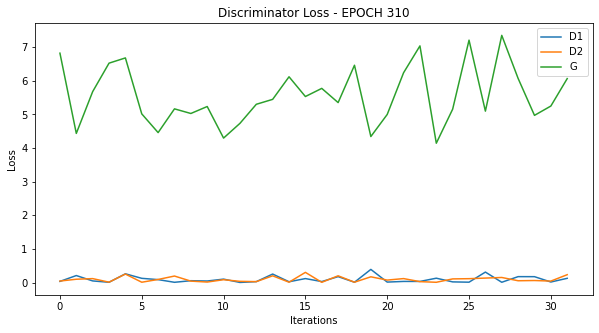

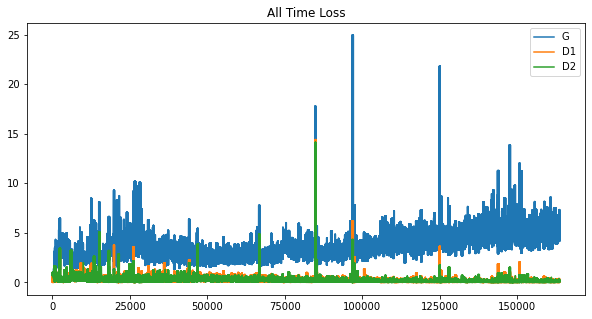

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 310/32, d1=0.056, d2=0.011, g=6.382
>1, 310/32, d1=0.112, d2=0.006, g=5.171
>2, 310/32, d1=0.147, d2=0.171, g=4.906
>3, 310/32, d1=0.031, d2=0.022, g=4.851
>4, 310/32, d1=0.028, d2=0.175, g=5.754
>5, 310/32, d1=0.186, d2=0.027, g=4.531
>6, 310/32, d1=0.056, d2=0.344, g=5.658
>7, 310/32, d1=0.102, d2=0.007, g=5.501
>8, 310/32, d1=0.050, d2=0.210, g=5.597
>9, 310/32, d1=0.226, d2=0.072, g=3.491
>10, 310/32, d1=0.016, d2=0.215, g=4.736
>11, 310/32, d1=0.015, d2=0.048, g=6.382
>12, 310/32, d1=0.464, d2=0.792, g=6.635
>13, 310/32, d1=0.467, d2=0.055, g=3.470
>14, 310/32, d1=0.012, d2=0.364, g=5.803
>15, 310/32, d1=0.139, d2=0.039, g=5.192
>16, 310/32, d1=0.014, d2=0.145, g=5.585
>17, 310/32, d1=0.181, d2=0.024, g=5.116
>18, 310/32, d1=0.280, d2=0.423, g=4.738
>19, 310/32, d1=0.025, d2=0.030, g=5.316
>20, 310/32, d1=0.006, d2=0.017, g=4.754
>21, 310/32, d1=0.036, d2=0.075, g=5.498
>22, 310/32, d1=0.281, d2=0.475, g=5.409
>23, 310/32, d1=0.218, d2=0.092, g=5.428
>24, 310/32, d1=0.061, d2=

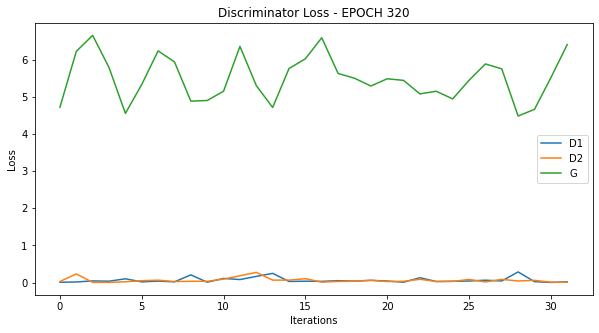

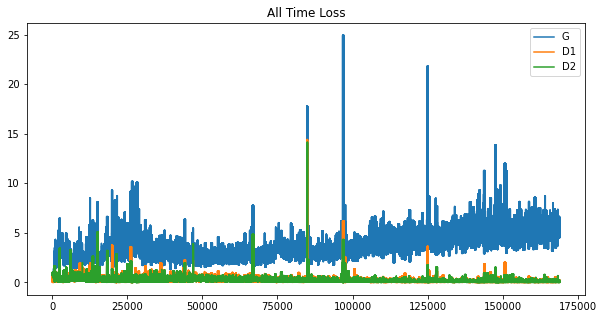

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 320/32, d1=0.171, d2=0.088, g=6.785
>1, 320/32, d1=0.033, d2=0.053, g=8.370
>2, 320/32, d1=0.050, d2=0.012, g=6.180
>3, 320/32, d1=0.101, d2=0.114, g=5.773
>4, 320/32, d1=0.037, d2=0.046, g=6.946
>5, 320/32, d1=0.013, d2=0.005, g=6.950
>6, 320/32, d1=0.077, d2=0.045, g=6.252
>7, 320/32, d1=0.010, d2=0.022, g=5.629
>8, 320/32, d1=0.079, d2=0.007, g=4.734
>9, 320/32, d1=0.002, d2=0.012, g=4.011
>10, 320/32, d1=0.016, d2=0.077, g=4.909
>11, 320/32, d1=0.012, d2=0.006, g=5.798
>12, 320/32, d1=0.014, d2=0.006, g=5.263
>13, 320/32, d1=0.020, d2=0.018, g=5.986
>14, 320/32, d1=0.004, d2=0.010, g=5.732
>15, 320/32, d1=0.004, d2=0.013, g=6.069
>16, 320/32, d1=0.001, d2=0.006, g=6.384
>17, 320/32, d1=0.030, d2=0.036, g=6.967
>18, 320/32, d1=0.063, d2=0.023, g=6.161
>19, 320/32, d1=0.004, d2=0.088, g=7.081
>20, 320/32, d1=0.046, d2=0.009, g=6.282
>21, 320/32, d1=0.032, d2=0.008, g=6.586
>22, 320/32, d1=0.039, d2=0.005, g=4.927
>23, 320/32, d1=0.001, d2=0.072, g=5.666
>24, 320/32, d1=0.039, d2=

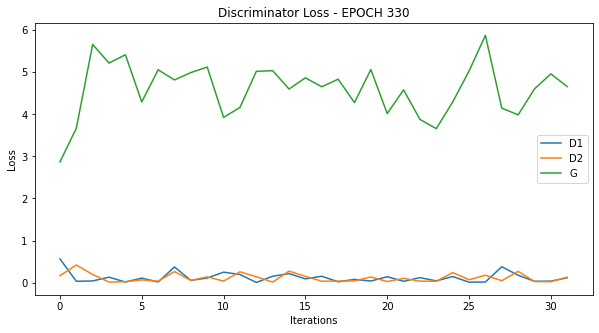

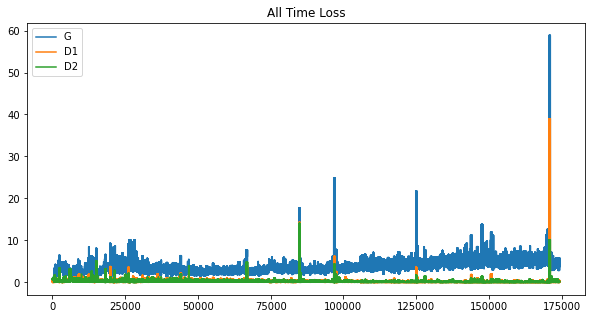

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 330/32, d1=0.055, d2=0.214, g=5.969
>1, 330/32, d1=0.171, d2=0.032, g=5.847
>2, 330/32, d1=0.026, d2=0.053, g=5.570
>3, 330/32, d1=0.165, d2=0.014, g=4.517
>4, 330/32, d1=0.010, d2=0.051, g=3.887
>5, 330/32, d1=0.083, d2=0.145, g=5.260
>6, 330/32, d1=0.047, d2=0.082, g=5.129
>7, 330/32, d1=0.217, d2=0.038, g=4.657
>8, 330/32, d1=0.047, d2=0.409, g=5.280
>9, 330/32, d1=0.068, d2=0.008, g=5.714
>10, 330/32, d1=0.267, d2=0.062, g=4.116
>11, 330/32, d1=0.035, d2=0.076, g=3.776
>12, 330/32, d1=0.022, d2=0.075, g=3.751
>13, 330/32, d1=0.013, d2=0.039, g=4.367
>14, 330/32, d1=0.042, d2=0.029, g=4.433
>15, 330/32, d1=0.052, d2=0.071, g=4.997
>16, 330/32, d1=0.029, d2=0.041, g=5.153
>17, 330/32, d1=0.059, d2=0.035, g=4.833
>18, 330/32, d1=0.134, d2=0.017, g=3.604
>19, 330/32, d1=0.041, d2=0.084, g=4.482
>20, 330/32, d1=0.057, d2=0.068, g=4.636
>21, 330/32, d1=0.077, d2=0.269, g=6.093
>22, 330/32, d1=0.090, d2=0.003, g=6.668
>23, 330/32, d1=0.509, d2=0.037, g=3.276
>24, 330/32, d1=0.049, d2=

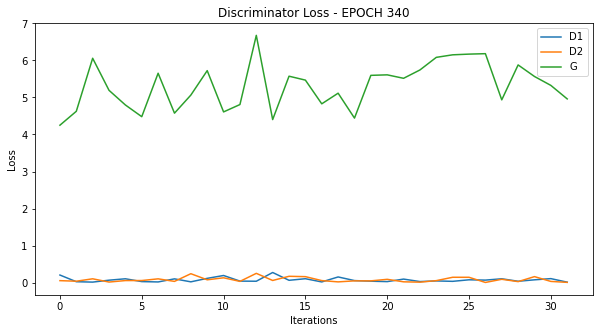

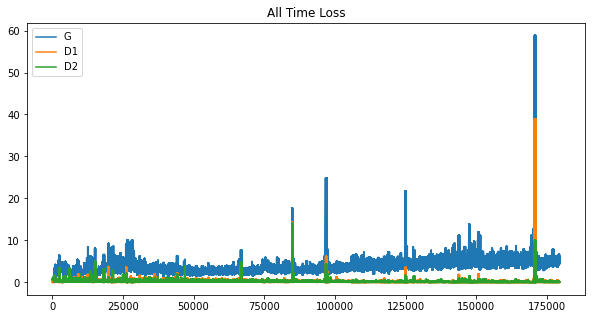

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 340/32, d1=0.041, d2=0.220, g=5.895
>1, 340/32, d1=0.154, d2=0.022, g=5.133
>2, 340/32, d1=0.082, d2=0.111, g=4.857
>3, 340/32, d1=0.088, d2=0.164, g=6.491
>4, 340/32, d1=0.147, d2=0.023, g=6.219
>5, 340/32, d1=0.088, d2=0.010, g=5.341
>6, 340/32, d1=0.098, d2=0.226, g=4.779
>7, 340/32, d1=0.034, d2=0.019, g=4.339
>8, 340/32, d1=0.014, d2=0.112, g=5.631
>9, 340/32, d1=0.033, d2=0.007, g=5.730
>10, 340/32, d1=0.144, d2=0.070, g=4.712
>11, 340/32, d1=0.002, d2=0.050, g=4.691
>12, 340/32, d1=0.075, d2=0.069, g=4.938
>13, 340/32, d1=0.083, d2=0.065, g=5.366
>14, 340/32, d1=0.067, d2=0.017, g=4.778
>15, 340/32, d1=0.023, d2=0.018, g=4.697
>16, 340/32, d1=0.004, d2=0.111, g=5.778
>17, 340/32, d1=0.087, d2=0.009, g=4.964
>18, 340/32, d1=0.033, d2=0.010, g=4.907
>19, 340/32, d1=0.059, d2=0.115, g=5.540
>20, 340/32, d1=0.078, d2=0.018, g=4.751
>21, 340/32, d1=0.004, d2=0.063, g=6.049
>22, 340/32, d1=0.021, d2=0.008, g=5.651
>23, 340/32, d1=0.013, d2=0.011, g=6.066
>24, 340/32, d1=0.142, d2=

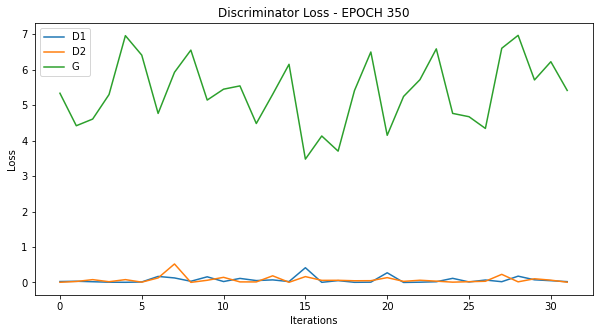

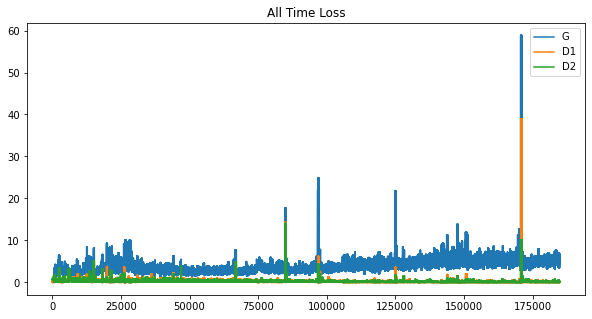

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 350/32, d1=0.071, d2=0.084, g=4.781
>1, 350/32, d1=0.004, d2=0.046, g=5.537
>2, 350/32, d1=0.079, d2=0.054, g=4.849
>3, 350/32, d1=0.011, d2=0.177, g=6.568
>4, 350/32, d1=0.035, d2=0.003, g=7.818
>5, 350/32, d1=0.129, d2=0.011, g=5.375
>6, 350/32, d1=0.018, d2=0.019, g=5.367
>7, 350/32, d1=0.034, d2=0.076, g=4.996
>8, 350/32, d1=0.023, d2=0.019, g=5.839
>9, 350/32, d1=0.062, d2=0.025, g=5.601
>10, 350/32, d1=0.030, d2=0.016, g=3.786
>11, 350/32, d1=0.008, d2=0.064, g=5.454
>12, 350/32, d1=0.031, d2=0.035, g=6.375
>13, 350/32, d1=0.062, d2=0.021, g=5.090
>14, 350/32, d1=0.085, d2=0.066, g=4.807
>15, 350/32, d1=0.158, d2=0.051, g=4.702
>16, 350/32, d1=0.009, d2=0.080, g=5.328
>17, 350/32, d1=0.116, d2=0.099, g=5.021
>18, 350/32, d1=0.081, d2=0.029, g=5.215
>19, 350/32, d1=0.045, d2=0.070, g=4.735
>20, 350/32, d1=0.024, d2=0.025, g=5.324
>21, 350/32, d1=0.041, d2=0.064, g=5.561
>22, 350/32, d1=0.080, d2=0.129, g=5.365
>23, 350/32, d1=0.072, d2=0.009, g=6.376
>24, 350/32, d1=0.052, d2=

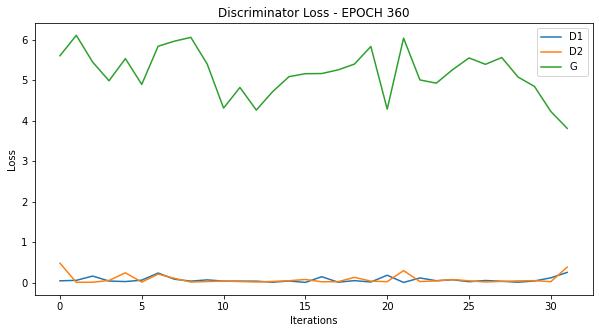

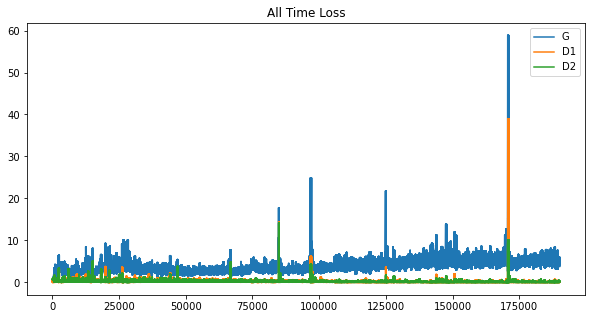

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 360/32, d1=0.070, d2=0.030, g=5.213
>1, 360/32, d1=0.197, d2=0.072, g=3.927
>2, 360/32, d1=0.019, d2=0.494, g=6.221
>3, 360/32, d1=0.243, d2=0.044, g=4.756
>4, 360/32, d1=0.038, d2=0.047, g=4.629
>5, 360/32, d1=0.121, d2=0.072, g=5.606
>6, 360/32, d1=0.027, d2=0.029, g=4.459
>7, 360/32, d1=0.056, d2=0.190, g=5.999
>8, 360/32, d1=0.054, d2=0.010, g=6.019
>9, 360/32, d1=0.058, d2=0.069, g=6.245
>10, 360/32, d1=0.033, d2=0.009, g=4.935
>11, 360/32, d1=0.015, d2=0.041, g=5.345
>12, 360/32, d1=0.049, d2=0.013, g=5.192
>13, 360/32, d1=0.154, d2=0.205, g=5.376
>14, 360/32, d1=0.003, d2=0.064, g=4.997
>15, 360/32, d1=0.132, d2=0.012, g=4.109
>16, 360/32, d1=0.031, d2=0.141, g=5.351
>17, 360/32, d1=0.049, d2=0.007, g=6.629
>18, 360/32, d1=0.037, d2=0.005, g=5.253
>19, 360/32, d1=0.015, d2=0.018, g=4.872
>20, 360/32, d1=0.108, d2=0.115, g=4.910
>21, 360/32, d1=0.082, d2=0.083, g=5.295
>22, 360/32, d1=0.061, d2=0.125, g=5.660
>23, 360/32, d1=0.085, d2=0.133, g=6.187
>24, 360/32, d1=0.005, d2=

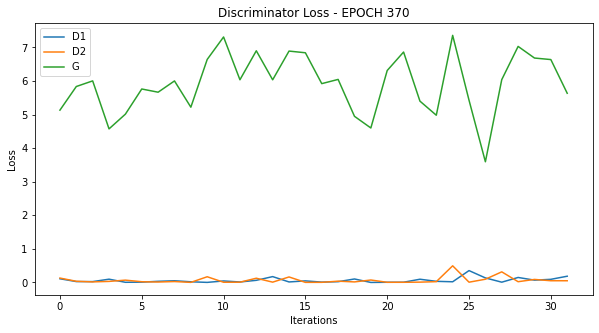

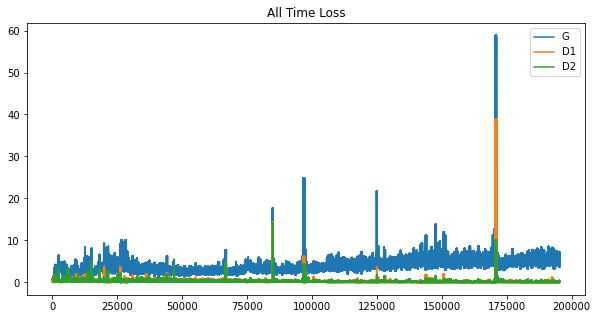

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 370/32, d1=0.002, d2=0.010, g=4.917
>1, 370/32, d1=0.058, d2=0.077, g=5.386
>2, 370/32, d1=0.007, d2=0.005, g=5.716
>3, 370/32, d1=0.056, d2=0.096, g=5.700
>4, 370/32, d1=0.046, d2=0.024, g=5.063
>5, 370/32, d1=0.012, d2=0.026, g=4.711
>6, 370/32, d1=0.012, d2=0.026, g=5.154
>7, 370/32, d1=0.073, d2=0.025, g=4.748
>8, 370/32, d1=0.013, d2=0.125, g=5.662
>9, 370/32, d1=0.023, d2=0.066, g=6.383
>10, 370/32, d1=0.178, d2=0.014, g=4.571
>11, 370/32, d1=0.015, d2=0.191, g=6.473
>12, 370/32, d1=0.235, d2=0.044, g=4.676
>13, 370/32, d1=0.005, d2=0.144, g=6.012
>14, 370/32, d1=0.056, d2=0.009, g=6.119
>15, 370/32, d1=0.032, d2=0.019, g=5.921
>16, 370/32, d1=0.039, d2=0.017, g=5.241
>17, 370/32, d1=0.113, d2=0.095, g=5.221
>18, 370/32, d1=0.019, d2=0.100, g=6.553
>19, 370/32, d1=0.107, d2=0.006, g=5.680
>20, 370/32, d1=0.017, d2=0.037, g=6.298
>21, 370/32, d1=0.012, d2=0.167, g=8.076
>22, 370/32, d1=0.056, d2=0.003, g=9.177
>23, 370/32, d1=0.283, d2=0.009, g=4.882
>24, 370/32, d1=0.001, d2=

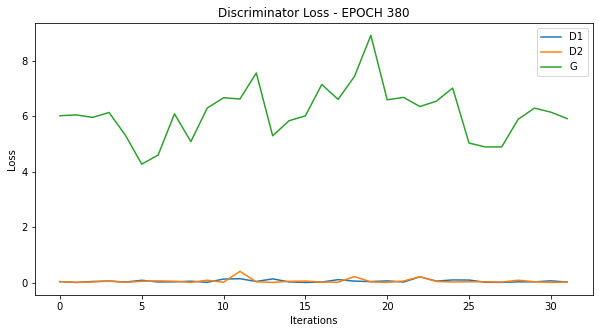

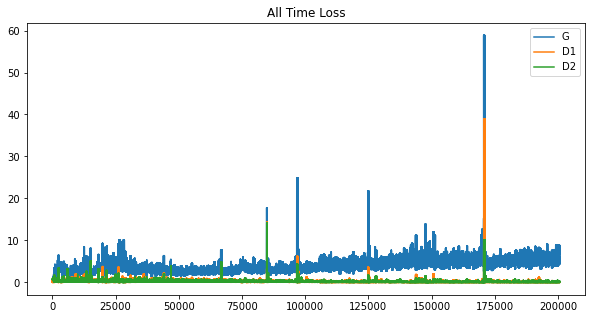

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 380/32, d1=0.009, d2=0.012, g=6.824
>1, 380/32, d1=0.090, d2=0.014, g=4.871
>2, 380/32, d1=0.018, d2=0.137, g=5.967
>3, 380/32, d1=0.072, d2=0.010, g=6.369
>4, 380/32, d1=0.032, d2=0.038, g=6.152
>5, 380/32, d1=0.010, d2=0.029, g=5.737
>6, 380/32, d1=0.041, d2=0.006, g=5.609
>7, 380/32, d1=0.113, d2=0.115, g=4.846
>8, 380/32, d1=0.108, d2=0.020, g=4.746
>9, 380/32, d1=0.002, d2=0.044, g=5.812
>10, 380/32, d1=0.013, d2=0.100, g=7.935
>11, 380/32, d1=0.250, d2=0.106, g=6.579
>12, 380/32, d1=0.071, d2=0.012, g=4.946
>13, 380/32, d1=0.039, d2=0.017, g=3.825
>14, 380/32, d1=0.014, d2=0.398, g=6.680
>15, 380/32, d1=0.187, d2=0.016, g=6.174
>16, 380/32, d1=0.485, d2=0.197, g=4.374
>17, 380/32, d1=0.007, d2=0.185, g=5.583
>18, 380/32, d1=0.041, d2=0.003, g=6.560
>19, 380/32, d1=0.247, d2=0.036, g=3.106
>20, 380/32, d1=0.006, d2=0.884, g=8.266
>21, 380/32, d1=0.141, d2=0.004, g=8.593
>22, 380/32, d1=0.536, d2=0.074, g=4.326
>23, 380/32, d1=0.001, d2=0.676, g=8.583
>24, 380/32, d1=0.557, d2=

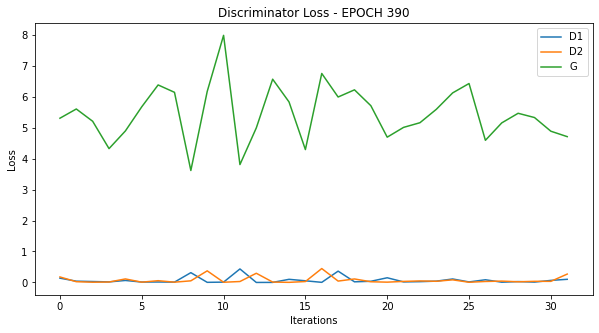

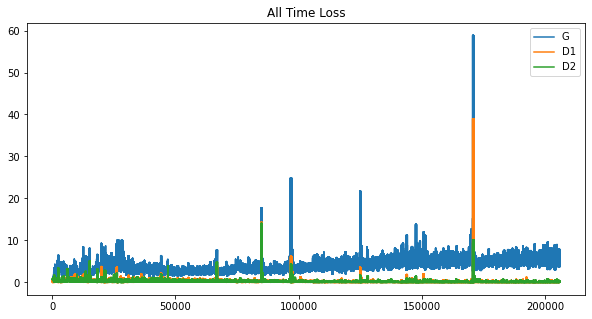

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 390/32, d1=0.036, d2=0.079, g=6.042
>1, 390/32, d1=0.018, d2=0.009, g=6.231
>2, 390/32, d1=0.048, d2=0.020, g=5.313
>3, 390/32, d1=0.101, d2=0.474, g=9.580
>4, 390/32, d1=0.152, d2=0.000, g=10.917
>5, 390/32, d1=0.831, d2=0.314, g=4.895
>6, 390/32, d1=0.010, d2=0.067, g=6.028
>7, 390/32, d1=0.061, d2=0.003, g=5.619
>8, 390/32, d1=0.009, d2=0.008, g=4.781
>9, 390/32, d1=0.037, d2=0.068, g=5.519
>10, 390/32, d1=0.140, d2=0.036, g=4.210
>11, 390/32, d1=0.004, d2=0.284, g=6.607
>12, 390/32, d1=0.031, d2=0.001, g=6.869
>13, 390/32, d1=0.290, d2=0.008, g=4.741
>14, 390/32, d1=0.019, d2=0.086, g=4.600
>15, 390/32, d1=0.206, d2=0.329, g=6.293
>16, 390/32, d1=0.058, d2=0.009, g=6.703
>17, 390/32, d1=0.073, d2=0.059, g=6.610
>18, 390/32, d1=0.083, d2=0.046, g=4.864
>19, 390/32, d1=0.020, d2=0.027, g=4.777
>20, 390/32, d1=0.119, d2=0.073, g=4.617
>21, 390/32, d1=0.058, d2=0.193, g=5.969
>22, 390/32, d1=0.005, d2=0.006, g=6.628
>23, 390/32, d1=0.033, d2=0.019, g=6.131
>24, 390/32, d1=0.069, d2

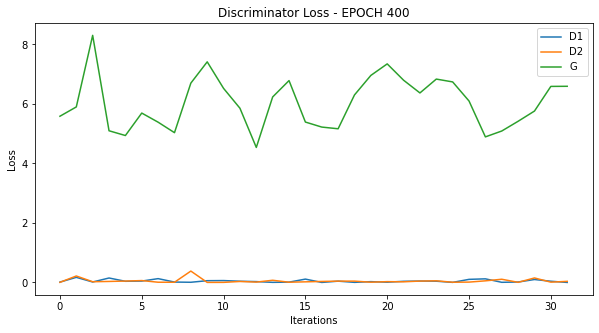

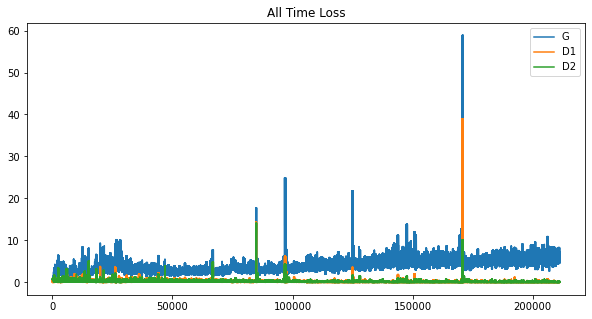

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 400/32, d1=0.041, d2=0.018, g=6.578
>1, 400/32, d1=0.040, d2=0.011, g=5.871
>2, 400/32, d1=0.003, d2=0.011, g=5.365
>3, 400/32, d1=0.082, d2=0.077, g=5.434
>4, 400/32, d1=0.033, d2=0.014, g=6.154
>5, 400/32, d1=0.043, d2=0.016, g=5.849
>6, 400/32, d1=0.049, d2=0.018, g=4.846
>7, 400/32, d1=0.006, d2=0.065, g=5.926
>8, 400/32, d1=0.005, d2=0.043, g=7.046
>9, 400/32, d1=0.397, d2=0.023, g=4.064
>10, 400/32, d1=0.002, d2=0.177, g=5.206
>11, 400/32, d1=0.161, d2=0.063, g=4.975
>12, 400/32, d1=0.013, d2=0.073, g=5.892
>13, 400/32, d1=0.047, d2=0.017, g=7.253
>14, 400/32, d1=0.044, d2=0.022, g=6.479
>15, 400/32, d1=0.222, d2=0.013, g=4.804
>16, 400/32, d1=0.042, d2=0.499, g=7.386
>17, 400/32, d1=0.070, d2=0.002, g=7.765
>18, 400/32, d1=0.504, d2=0.124, g=4.913
>19, 400/32, d1=0.011, d2=1.664, g=13.106
>20, 400/32, d1=1.054, d2=0.009, g=5.771
>21, 400/32, d1=0.144, d2=11.700, g=17.610
>22, 400/32, d1=5.052, d2=20.710, g=22.120
>23, 400/32, d1=11.726, d2=4.354, g=13.205
>24, 400/32, d1=9.3

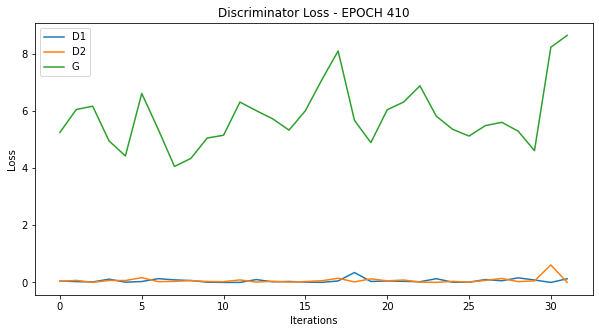

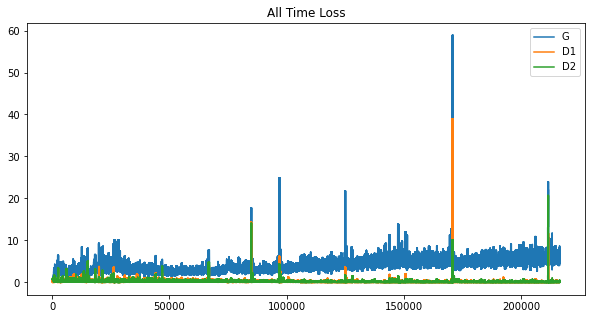

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 410/32, d1=0.706, d2=0.018, g=4.439
>1, 410/32, d1=0.010, d2=0.192, g=4.494
>2, 410/32, d1=0.007, d2=0.121, g=5.530
>3, 410/32, d1=0.049, d2=0.018, g=6.442
>4, 410/32, d1=0.169, d2=0.113, g=5.146
>5, 410/32, d1=0.045, d2=0.062, g=4.858
>6, 410/32, d1=0.058, d2=0.024, g=4.534
>7, 410/32, d1=0.106, d2=0.073, g=5.112
>8, 410/32, d1=0.022, d2=0.089, g=5.568
>9, 410/32, d1=0.017, d2=0.091, g=7.292
>10, 410/32, d1=0.075, d2=0.022, g=7.220
>11, 410/32, d1=0.035, d2=0.044, g=7.018
>12, 410/32, d1=0.084, d2=0.006, g=5.415
>13, 410/32, d1=0.101, d2=0.062, g=5.433
>14, 410/32, d1=0.024, d2=0.026, g=5.594
>15, 410/32, d1=0.023, d2=0.028, g=4.667
>16, 410/32, d1=0.007, d2=0.084, g=6.138
>17, 410/32, d1=0.009, d2=0.011, g=6.986
>18, 410/32, d1=0.172, d2=0.003, g=5.644
>19, 410/32, d1=0.049, d2=0.093, g=4.316
>20, 410/32, d1=0.014, d2=0.007, g=6.126
>21, 410/32, d1=0.038, d2=0.053, g=5.737
>22, 410/32, d1=0.030, d2=0.130, g=5.629
>23, 410/32, d1=0.012, d2=0.041, g=6.921
>24, 410/32, d1=0.061, d2=

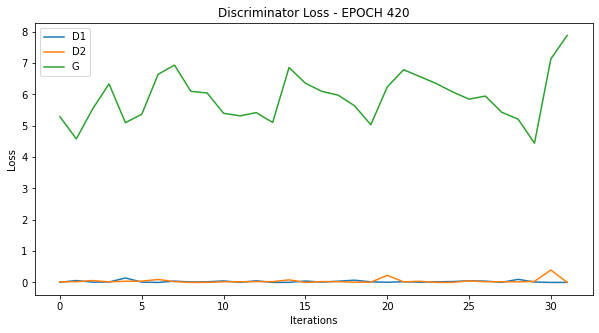

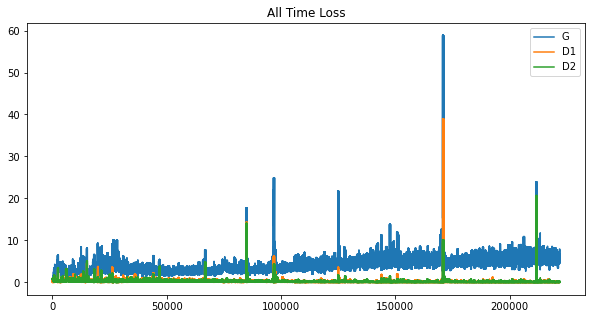

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 420/32, d1=0.247, d2=0.154, g=5.287
>1, 420/32, d1=0.013, d2=0.015, g=5.177
>2, 420/32, d1=0.014, d2=0.007, g=5.269
>3, 420/32, d1=0.027, d2=0.180, g=6.908
>4, 420/32, d1=0.097, d2=0.006, g=5.661
>5, 420/32, d1=0.051, d2=0.017, g=5.632
>6, 420/32, d1=0.019, d2=0.051, g=4.713
>7, 420/32, d1=0.016, d2=0.047, g=6.150
>8, 420/32, d1=0.080, d2=0.003, g=5.810
>9, 420/32, d1=0.025, d2=0.240, g=7.001
>10, 420/32, d1=0.169, d2=0.005, g=5.600
>11, 420/32, d1=0.008, d2=0.069, g=6.355
>12, 420/32, d1=0.039, d2=0.159, g=6.266
>13, 420/32, d1=0.085, d2=0.024, g=6.031
>14, 420/32, d1=0.019, d2=0.209, g=6.772
>15, 420/32, d1=0.025, d2=0.011, g=6.872
>16, 420/32, d1=0.136, d2=0.031, g=5.503
>17, 420/32, d1=0.008, d2=0.026, g=4.844
>18, 420/32, d1=0.003, d2=0.026, g=6.027
>19, 420/32, d1=0.024, d2=0.022, g=6.037
>20, 420/32, d1=0.027, d2=0.047, g=6.275
>21, 420/32, d1=0.011, d2=0.023, g=6.520
>22, 420/32, d1=0.082, d2=0.015, g=5.542
>23, 420/32, d1=0.041, d2=0.026, g=5.204
>24, 420/32, d1=0.001, d2=

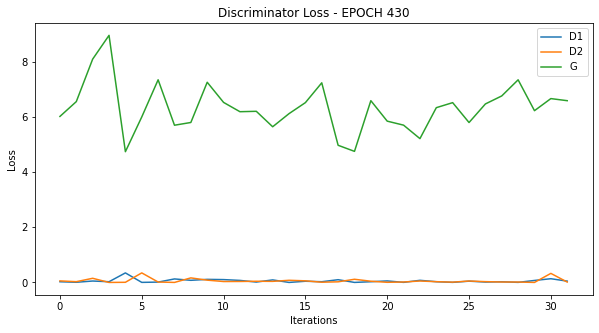

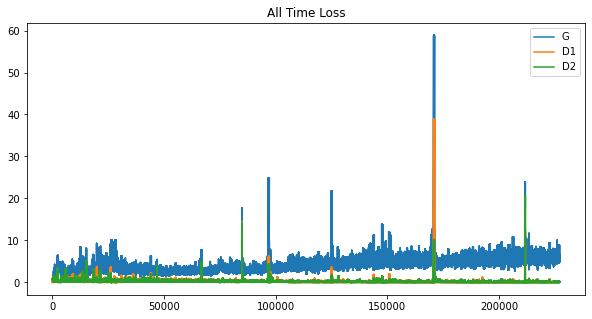

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 430/32, d1=0.045, d2=0.014, g=5.670
>1, 430/32, d1=0.132, d2=0.009, g=4.309
>2, 430/32, d1=0.013, d2=0.259, g=6.519
>3, 430/32, d1=0.017, d2=0.029, g=7.875
>4, 430/32, d1=0.227, d2=0.037, g=7.565
>5, 430/32, d1=0.123, d2=0.040, g=4.996
>6, 430/32, d1=0.013, d2=0.030, g=4.535
>7, 430/32, d1=0.007, d2=0.048, g=5.579
>8, 430/32, d1=0.002, d2=0.007, g=6.555
>9, 430/32, d1=0.102, d2=0.077, g=6.410
>10, 430/32, d1=0.063, d2=0.032, g=5.359
>11, 430/32, d1=0.007, d2=0.082, g=5.758
>12, 430/32, d1=0.079, d2=0.010, g=6.380
>13, 430/32, d1=0.021, d2=0.158, g=7.163
>14, 430/32, d1=0.127, d2=0.011, g=5.739
>15, 430/32, d1=0.009, d2=0.017, g=5.560
>16, 430/32, d1=0.065, d2=0.059, g=5.523
>17, 430/32, d1=0.002, d2=0.014, g=5.840
>18, 430/32, d1=0.007, d2=0.018, g=6.687
>19, 430/32, d1=0.028, d2=0.177, g=6.356
>20, 430/32, d1=0.096, d2=0.091, g=6.929
>21, 430/32, d1=0.037, d2=0.004, g=6.845
>22, 430/32, d1=0.193, d2=0.104, g=5.361
>23, 430/32, d1=0.012, d2=0.070, g=5.988
>24, 430/32, d1=0.003, d2=

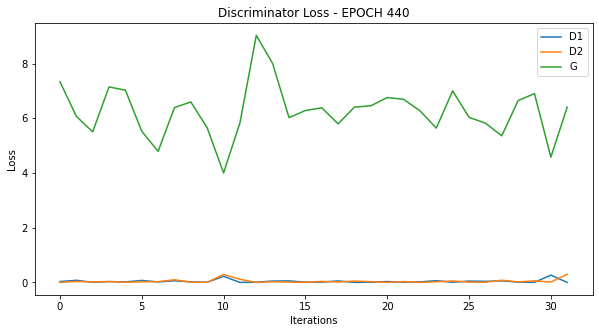

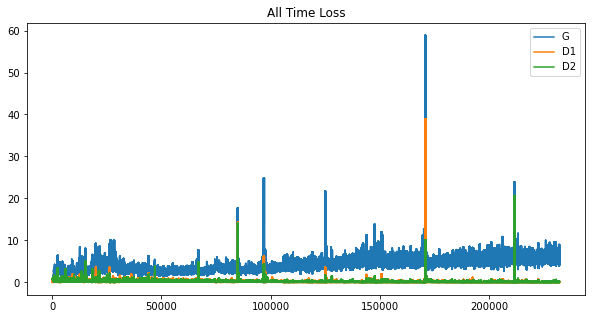

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 440/32, d1=0.004, d2=0.004, g=7.867
>1, 440/32, d1=0.039, d2=0.001, g=7.742
>2, 440/32, d1=0.239, d2=0.168, g=6.157
>3, 440/32, d1=0.011, d2=0.002, g=6.514
>4, 440/32, d1=0.003, d2=0.003, g=7.865
>5, 440/32, d1=0.139, d2=0.054, g=6.633
>6, 440/32, d1=0.005, d2=0.007, g=6.785
>7, 440/32, d1=0.031, d2=0.025, g=6.241
>8, 440/32, d1=0.006, d2=0.065, g=6.678
>9, 440/32, d1=0.028, d2=0.001, g=7.163
>10, 440/32, d1=0.036, d2=0.035, g=6.581
>11, 440/32, d1=0.006, d2=0.064, g=6.788
>12, 440/32, d1=0.048, d2=0.015, g=6.281
>13, 440/32, d1=0.001, d2=0.013, g=6.092
>14, 440/32, d1=0.045, d2=0.010, g=6.216
>15, 440/32, d1=0.005, d2=0.024, g=6.332
>16, 440/32, d1=0.045, d2=0.048, g=6.076
>17, 440/32, d1=0.045, d2=0.099, g=6.027
>18, 440/32, d1=0.074, d2=0.029, g=5.598
>19, 440/32, d1=0.319, d2=0.328, g=6.363
>20, 440/32, d1=0.087, d2=0.036, g=5.784
>21, 440/32, d1=0.016, d2=0.006, g=5.589
>22, 440/32, d1=0.002, d2=0.015, g=5.503
>23, 440/32, d1=0.031, d2=0.076, g=6.635
>24, 440/32, d1=0.040, d2=

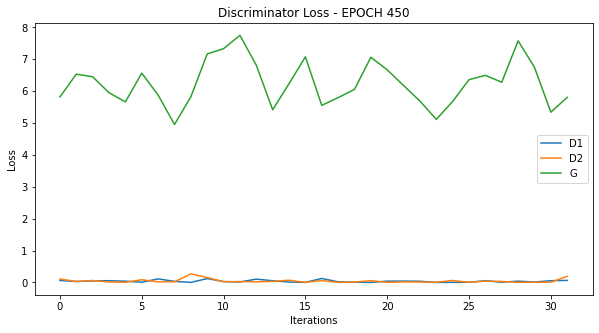

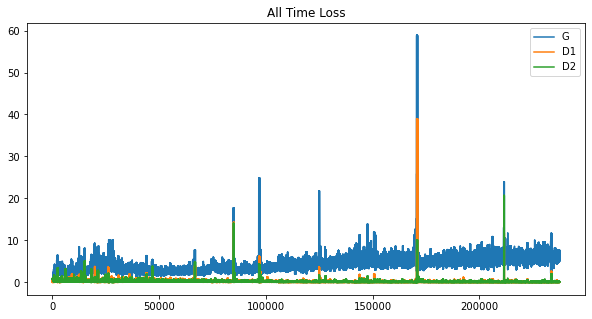

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 450/32, d1=0.004, d2=0.010, g=6.200
>1, 450/32, d1=0.011, d2=0.038, g=6.248
>2, 450/32, d1=0.072, d2=0.021, g=5.816
>3, 450/32, d1=0.064, d2=0.023, g=5.363
>4, 450/32, d1=0.015, d2=0.027, g=4.857
>5, 450/32, d1=0.024, d2=0.161, g=5.799
>6, 450/32, d1=0.008, d2=0.019, g=6.940
>7, 450/32, d1=0.020, d2=0.010, g=6.733
>8, 450/32, d1=0.024, d2=0.038, g=6.805
>9, 450/32, d1=0.119, d2=0.011, g=6.723
>10, 450/32, d1=0.015, d2=0.060, g=6.127
>11, 450/32, d1=0.011, d2=0.027, g=5.400
>12, 450/32, d1=0.003, d2=0.015, g=7.147
>13, 450/32, d1=0.009, d2=0.003, g=6.616
>14, 450/32, d1=0.236, d2=0.043, g=4.678
>15, 450/32, d1=0.002, d2=0.064, g=5.796
>16, 450/32, d1=0.015, d2=0.014, g=6.150
>17, 450/32, d1=0.003, d2=0.012, g=6.257
>18, 450/32, d1=0.017, d2=0.025, g=6.418
>19, 450/32, d1=0.045, d2=0.009, g=5.366
>20, 450/32, d1=0.006, d2=0.044, g=6.830
>21, 450/32, d1=0.033, d2=0.054, g=6.144
>22, 450/32, d1=0.026, d2=0.098, g=8.169
>23, 450/32, d1=0.209, d2=0.032, g=7.471
>24, 450/32, d1=0.077, d2=

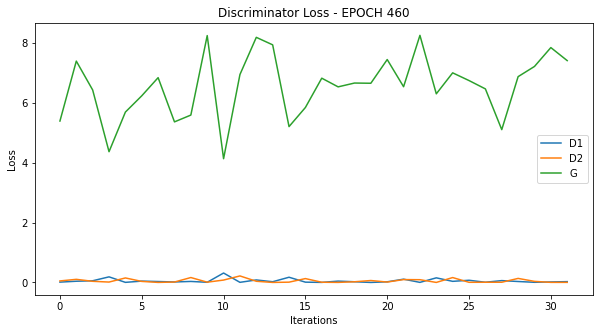

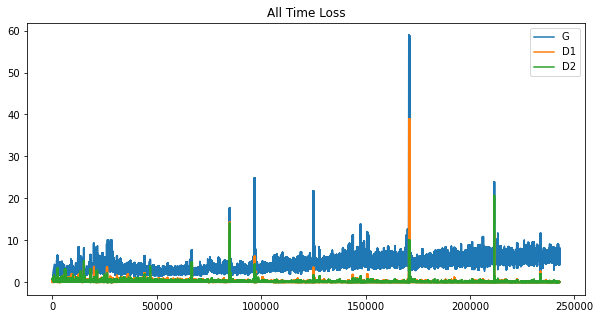

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 460/32, d1=0.064, d2=0.011, g=6.241
>1, 460/32, d1=0.009, d2=0.053, g=6.055
>2, 460/32, d1=0.009, d2=0.020, g=6.229
>3, 460/32, d1=0.012, d2=0.008, g=7.390
>4, 460/32, d1=0.042, d2=0.003, g=5.712
>5, 460/32, d1=0.031, d2=0.050, g=6.256
>6, 460/32, d1=0.123, d2=0.312, g=6.692
>7, 460/32, d1=0.015, d2=0.010, g=8.839
>8, 460/32, d1=0.171, d2=0.005, g=6.324
>9, 460/32, d1=0.016, d2=0.117, g=6.035
>10, 460/32, d1=0.022, d2=0.008, g=6.367
>11, 460/32, d1=0.024, d2=0.008, g=6.062
>12, 460/32, d1=0.027, d2=0.023, g=5.658
>13, 460/32, d1=0.005, d2=0.013, g=6.235
>14, 460/32, d1=0.007, d2=0.022, g=6.079
>15, 460/32, d1=0.002, d2=0.010, g=6.686
>16, 460/32, d1=0.005, d2=0.038, g=6.692
>17, 460/32, d1=0.040, d2=0.004, g=7.120
>18, 460/32, d1=0.007, d2=0.008, g=6.735
>19, 460/32, d1=0.032, d2=0.017, g=6.225
>20, 460/32, d1=0.010, d2=0.011, g=6.385
>21, 460/32, d1=0.028, d2=0.004, g=6.126
>22, 460/32, d1=0.011, d2=0.079, g=6.771
>23, 460/32, d1=0.010, d2=0.006, g=6.736
>24, 460/32, d1=0.005, d2=

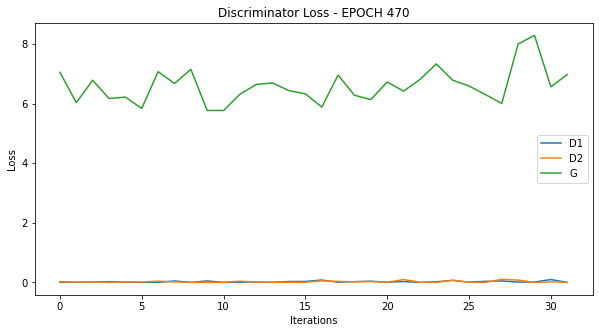

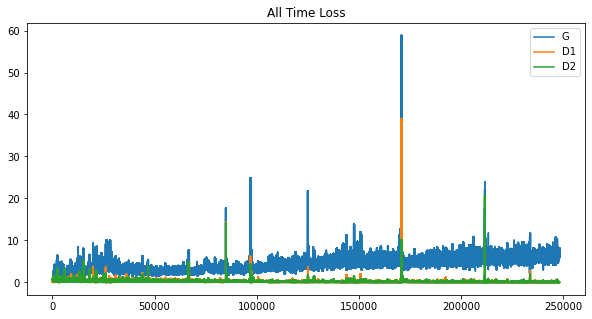

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 470/32, d1=0.070, d2=0.024, g=4.231
>1, 470/32, d1=0.002, d2=0.321, g=8.636
>2, 470/32, d1=0.020, d2=0.000, g=9.539
>3, 470/32, d1=0.114, d2=0.004, g=7.102
>4, 470/32, d1=0.001, d2=0.001, g=6.986
>5, 470/32, d1=0.093, d2=0.037, g=6.464
>6, 470/32, d1=0.018, d2=0.044, g=5.983
>7, 470/32, d1=0.009, d2=0.034, g=7.267
>8, 470/32, d1=0.008, d2=0.003, g=6.817
>9, 470/32, d1=0.049, d2=0.004, g=6.548
>10, 470/32, d1=0.189, d2=0.066, g=4.473
>11, 470/32, d1=0.002, d2=0.057, g=5.662
>12, 470/32, d1=0.003, d2=0.010, g=6.022
>13, 470/32, d1=0.004, d2=0.008, g=6.661
>14, 470/32, d1=0.001, d2=0.003, g=7.250
>15, 470/32, d1=0.039, d2=0.044, g=7.404
>16, 470/32, d1=0.213, d2=0.115, g=5.881
>17, 470/32, d1=0.001, d2=0.010, g=6.706
>18, 470/32, d1=0.018, d2=0.102, g=6.811
>19, 470/32, d1=0.139, d2=0.055, g=5.737
>20, 470/32, d1=0.025, d2=0.019, g=5.857
>21, 470/32, d1=0.034, d2=0.010, g=5.543
>22, 470/32, d1=0.003, d2=0.073, g=6.775
>23, 470/32, d1=0.004, d2=0.032, g=7.540
>24, 470/32, d1=0.013, d2=

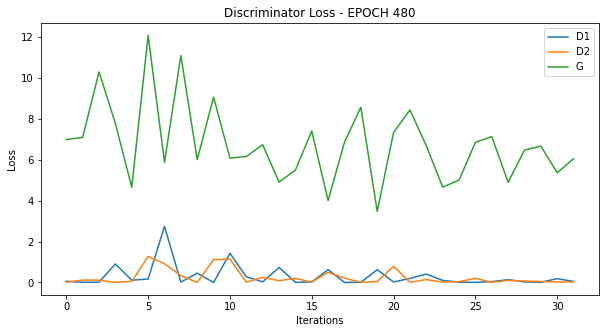

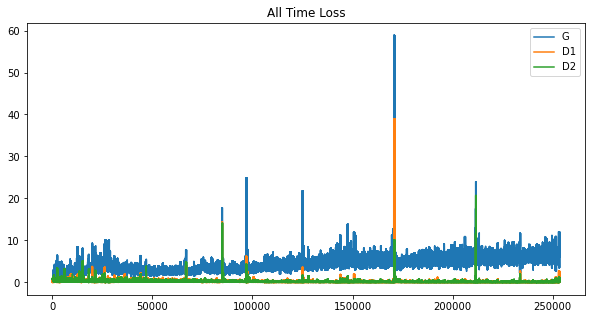

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 480/32, d1=0.047, d2=0.077, g=5.953
>1, 480/32, d1=0.063, d2=0.094, g=4.985
>2, 480/32, d1=0.163, d2=0.031, g=4.622
>3, 480/32, d1=0.016, d2=0.213, g=5.916
>4, 480/32, d1=0.008, d2=0.004, g=6.866
>5, 480/32, d1=0.045, d2=0.008, g=6.397
>6, 480/32, d1=0.078, d2=0.008, g=5.362
>7, 480/32, d1=0.007, d2=0.037, g=5.360
>8, 480/32, d1=0.018, d2=0.014, g=5.655
>9, 480/32, d1=0.023, d2=0.009, g=5.019
>10, 480/32, d1=0.071, d2=0.086, g=4.970
>11, 480/32, d1=0.064, d2=0.188, g=6.360
>12, 480/32, d1=0.036, d2=0.018, g=7.380
>13, 480/32, d1=0.126, d2=0.013, g=6.010
>14, 480/32, d1=0.128, d2=0.098, g=4.552
>15, 480/32, d1=0.089, d2=0.328, g=5.824
>16, 480/32, d1=0.137, d2=0.008, g=5.662
>17, 480/32, d1=0.015, d2=0.034, g=5.985
>18, 480/32, d1=0.019, d2=0.131, g=7.253
>19, 480/32, d1=0.061, d2=0.009, g=6.527
>20, 480/32, d1=0.129, d2=0.076, g=6.350
>21, 480/32, d1=0.020, d2=0.032, g=6.504
>22, 480/32, d1=0.024, d2=0.051, g=5.897
>23, 480/32, d1=0.134, d2=0.013, g=5.563
>24, 480/32, d1=0.001, d2=

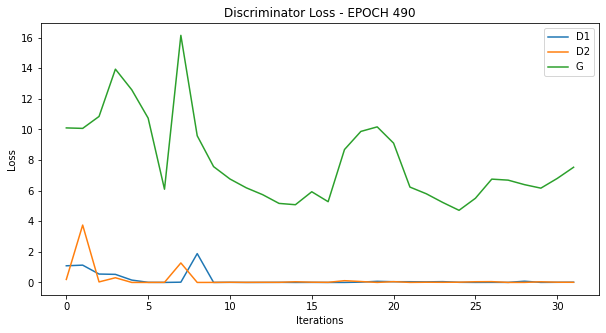

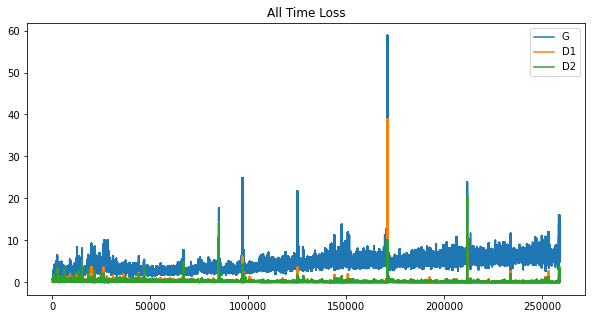

/home/ec2-user/anaconda3/envs/tensorflow2_p36/lib/python3.6/site-packages/keras/engine/training.py:297: UserWarning: Discrepancy between trainable weights and collected trainable weights, did you set `model.trainable` without calling `model.compile` after ?
  'Discrepancy between trainable weights and collected trainable'


>0, 490/32, d1=0.017, d2=0.004, g=7.143
>1, 490/32, d1=0.001, d2=0.021, g=6.610
>2, 490/32, d1=0.005, d2=0.013, g=6.636
>3, 490/32, d1=0.016, d2=0.035, g=7.773
>4, 490/32, d1=0.011, d2=0.003, g=7.223
>5, 490/32, d1=0.003, d2=0.071, g=7.914
>6, 490/32, d1=0.160, d2=0.011, g=6.492
>7, 490/32, d1=0.094, d2=0.350, g=7.577
>8, 490/32, d1=0.083, d2=0.002, g=8.842
>9, 490/32, d1=0.082, d2=0.001, g=6.552
>10, 490/32, d1=0.020, d2=0.008, g=5.393
>11, 490/32, d1=0.015, d2=0.031, g=5.245
>12, 490/32, d1=0.008, d2=0.005, g=6.450
>13, 490/32, d1=0.003, d2=0.176, g=8.322
>14, 490/32, d1=0.369, d2=0.026, g=5.038
>15, 490/32, d1=0.016, d2=0.019, g=5.096
>16, 490/32, d1=0.026, d2=0.026, g=5.070
>17, 490/32, d1=0.004, d2=0.118, g=8.123
>18, 490/32, d1=0.067, d2=0.001, g=7.685
>19, 490/32, d1=0.005, d2=0.024, g=7.299
>20, 490/32, d1=0.119, d2=0.022, g=5.774
>21, 490/32, d1=0.002, d2=0.011, g=5.348
>22, 490/32, d1=0.002, d2=0.034, g=6.453
>23, 490/32, d1=0.022, d2=0.029, g=7.179
>24, 490/32, d1=0.011, d2=

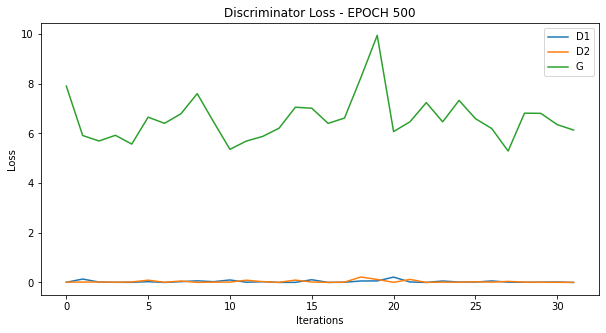

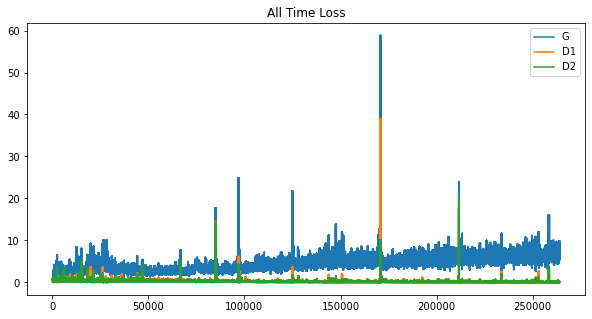

Mission completed: 1641.293396949768


In [82]:
from tqdm.notebook import trange, tqdm
import time
train(g_model, d_model, gan_model, X, latent_dim)

In [64]:
# example of loading the generator model and generating images
from keras.models import load_model
from numpy.random import randn

def create_plot(examples, n):
    # loading model
    model = load_model('generator_model_500.h5')
    # generate images
    latent_points = generate_latent_points(100, examples)
    # generate images
    X = model.predict(latent_points)
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    fig = plt.figure(figsize=(10,10))
    # plot images
    for i in range(n*n):
        plt.subplot(n, n, i+1)
        plt.axis('off')
        plt.imshow(X[i])
    # save plot to file

    filename = 'generator_signature'
    plt.savefig(filename)
    plt.close()
    
 
    


create_plot(1, 1)
